# Deep Learning | Model Optimization

### Dataset: MNIST Fashion| Framework: Keras (Tensorflow)

🎯 Objective: Move from a basic MLP to a well-tuned model and benchmark against classical ML methods.
- Baseline MLP typically scores ~58–60% accuracy.
- Deep regularized MLPs can achieve ~80–94% with tuning.
- Tree-based methods like Random Forest or XGBoost may reach ~97%.

## 📌 Step 1: Load and Preprocess the Data

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# Load data
data = fetch_covtype()
X, y = data.data, data.target - 1  # make 0-indexed

In [5]:
X.shape

(581012, 54)

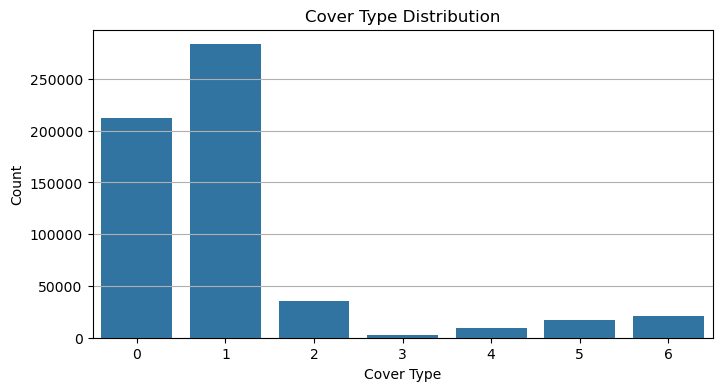

In [6]:
# Class distribution
plt.figure(figsize=(8,4))
sns.countplot(x=y)
plt.title("Cover Type Distribution")
plt.xlabel("Cover Type")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()

In [7]:
print("\nClass distribution:")
print(pd.Series(y).value_counts().sort_index())


Class distribution:
0    211840
1    283301
2     35754
3      2747
4      9493
5     17367
6     20510
Name: count, dtype: int64


In [8]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [9]:
X_train.shape

(464809, 54)

In [10]:
# Standardize inputs
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# # One-hot encode labels
# y_train_cat = to_categorical(y_train, num_classes=7)
# y_test_cat = to_categorical(y_test, num_classes=7)

## 📌 Step 2: Define and Train a Baseline MLP Model

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, LeakyReLU, BatchNormalization, Activation, Dropout
from tensorflow.keras.optimizers import SGD, Adam

In [13]:
baseline_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')
])

baseline_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         7,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,607 (68.78 KB)

 Trainable params: 17,607 (68.78 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
baseline_model.compile(optimizer=Adam(learning_rate=0.01),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

In [15]:
history_baseline = baseline_model.fit(X_train, y_train,
                                      validation_split=0.2,
                                      epochs=30,
                                      batch_size=256,
                                      verbose=1)

Epoch 1/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7358 - loss: 0.6210 - val_accuracy: 0.8115 - val_loss: 0.4491
Epoch 2/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8145 - loss: 0.4408 - val_accuracy: 0.8195 - val_loss: 0.4333
Epoch 3/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8355 - loss: 0.3973 - val_accuracy: 0.8378 - val_loss: 0.3978
Epoch 4/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8430 - loss: 0.3813 - val_accuracy: 0.8446 - val_loss: 0.3865
Epoch 5/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8487 - loss: 0.3715 - val_accuracy: 0.8504 - val_loss: 0.3664
Epoch 6/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8529 - loss: 0.3591 - val_accuracy: 0.8531 - val_loss: 0.3601
Epoch 7/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8588 - loss: 0.3471 - val_accuracy: 0.8525 - val_loss: 0.3581
Epoch 8/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8635 - loss: 0.3360 - 

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
def plot_learning_curves(history, title='Model'):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Train Accuracy')
    plt.plot(epochs, val_acc, 'r--', label='Val Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-', label='Train Loss')
    plt.plot(epochs, val_loss, 'r--', label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

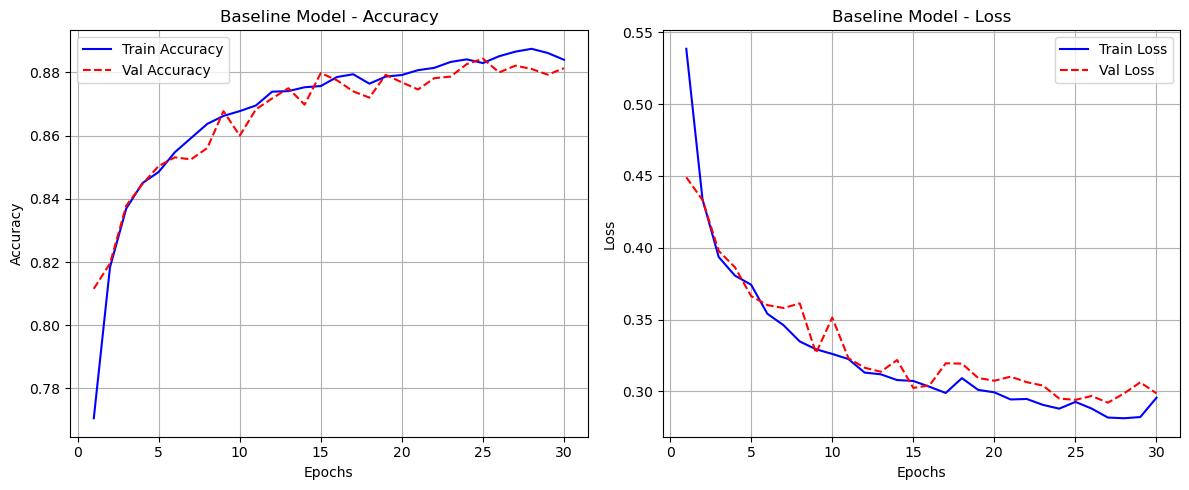

In [18]:
plot_learning_curves(history_baseline, title='Baseline Model')

In [19]:
loss1, acc1 = baseline_model.evaluate(X_test, y_test)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 4s 980us/step - accuracy: 0.8829 - loss: 0.2956
Test accuracy : 88.13%
Test loss     : 29.77%


# 3.1 NEURAL NETWORK ARCHITECTURE

Modify the baseline MLP architecture by exploring deeper or wider configurations.



*   Added another dense layer
*   Using Relu






In [20]:
baseline_model_more_layers = Sequential([
    Input(shape=(X_train.shape[1],)),
    #Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')
])

baseline_model_more_layers.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │        14,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,543 (224.78 KB)

 Trainable params: 57,543 (224.78 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
baseline_model_more_layers.compile(optimizer=Adam(learning_rate=0.01),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

In [22]:
history_baseline_more_layers = baseline_model_more_layers.fit(X_train, y_train,
                                      validation_split=0.2,
                                      epochs=30,
                                      batch_size=256,
                                      verbose=1)

Epoch 1/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7341 - loss: 0.6236 - val_accuracy: 0.8045 - val_loss: 0.4629
Epoch 2/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8107 - loss: 0.4528 - val_accuracy: 0.8225 - val_loss: 0.4300
Epoch 3/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8294 - loss: 0.4119 - val_accuracy: 0.8404 - val_loss: 0.3913
Epoch 4/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8401 - loss: 0.3879 - val_accuracy: 0.8422 - val_loss: 0.3927
Epoch 5/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8467 - loss: 0.3744 - val_accuracy: 0.8536 - val_loss: 0.3594
Epoch 6/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8557 - loss: 0.3558 - val_accuracy: 0.8532 - val_loss: 0.3637
Epoch 7/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8611 - loss: 0.3435 - val_accuracy: 0.8606 - val_loss: 0.3485
Epoch 8/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8641 - loss: 0.3358 - 

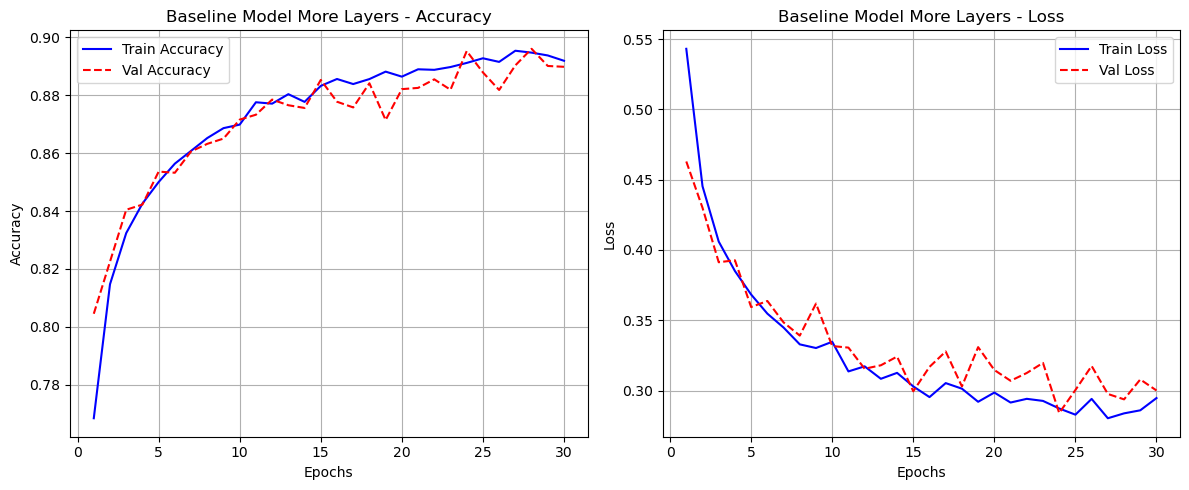

In [23]:
plot_learning_curves(history_baseline_more_layers, title='Baseline Model More Layers')

In [24]:
loss1, acc1 = baseline_model_more_layers.evaluate(X_test, y_test)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8893 - loss: 0.3020
Test accuracy : 88.90%
Test loss     : 30.14%


By adding more dense layer model gives better results
and it is slightly overfit

Experiment with different activation functions (e.g., ReLU, LeakyReLU, SELU).

In [25]:
baseline_model_LeakyReLU = Sequential([
    Input(shape=(X_train.shape[1],)),
    # Dense(512),
    # LeakyReLU(alpha=0.01),
    Dense(256),
    LeakyReLU(alpha=0.01),
    Dense(128),
    LeakyReLU(alpha=0.01),
    Dense(64),
    LeakyReLU(alpha=0.01),
    Dense(32),
    LeakyReLU(alpha=0.01),
    Dense(7, activation='softmax')
])

baseline_model_LeakyReLU.summary()

baseline_model_LeakyReLU.compile(optimizer=Adam(learning_rate=0.01),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

history_baseline_LeakyReLU = baseline_model_LeakyReLU.fit(X_train, y_train,
                                      validation_split=0.2,
                                      epochs=30,
                                      batch_size=256,
                                      verbose=1)

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 256)            │        14,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,543 (224.78 KB)

 Trainable params: 57,543 (224.78 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7359 - loss: 0.6233 - val_accuracy: 0.8079 - val_loss: 0.4578
Epoch 2/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8176 - loss: 0.4405 - val_accuracy: 0.8314 - val_loss: 0.4100
Epoch 3/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8364 - loss: 0.4005 - val_accuracy: 0.8424 - val_loss: 0.3927
Epoch 4/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8505 - loss: 0.3673 - val_accuracy: 0.8651 - val_loss: 0.3407
Epoch 5/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8617 - loss: 0.3425 - val_accuracy: 0.8666 - val_loss: 0.3288
Epoch 6/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8737 - loss: 0.3123 - val_accuracy: 0.8692 - val_loss: 0.3276
Epoch 7/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8783 - loss: 0.3003 - val_accuracy: 0.8808 - val_loss: 0.2958
Epoch 8/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8834 - loss: 0.2864 - 

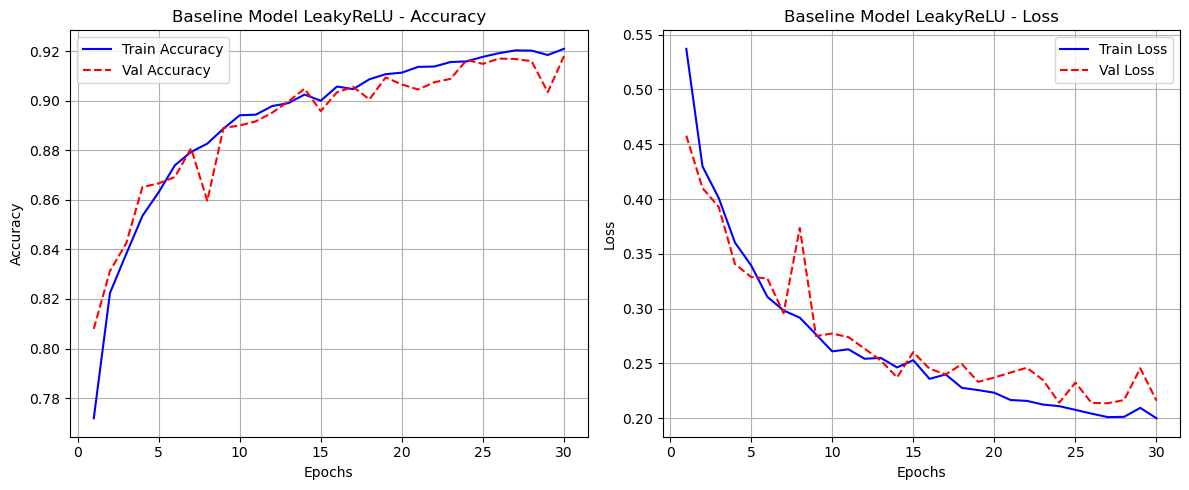

In [26]:
plot_learning_curves(history_baseline_LeakyReLU, title='Baseline Model LeakyReLU')

In [27]:
loss1, acc1 = baseline_model_LeakyReLU.evaluate(X_test, y_test)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9160 - loss: 0.2182
Test accuracy : 91.60%
Test loss     : 21.86%


leakyrelu gives better results than Relu but still slightly overfit so we will be using Leakyrelu from now on

**Apply Batch Normalization.**

In [28]:
baseline_model_Batch_Norm = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(512),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(256),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(128),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(64),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(32),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(7, activation='softmax')
])

baseline_model_Batch_Norm.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 512)            │        28,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,919 (808.28 KB)

 Trainable params: 204,935 (800.53 KB)

 Non-trainable params: 1,984 (7.75 KB)

In [29]:
baseline_model_Batch_Norm.compile(optimizer=Adam(learning_rate=0.01),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

In [30]:
history_baseline_Batch_Norm = baseline_model_Batch_Norm.fit(X_train, y_train,
                                      validation_split=0.2,
                                      epochs=30,
                                      batch_size=256,
                                      verbose=1)

Epoch 1/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7450 - loss: 0.6091 - val_accuracy: 0.8245 - val_loss: 0.4180
Epoch 2/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8322 - loss: 0.3992 - val_accuracy: 0.8545 - val_loss: 0.3503
Epoch 3/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8603 - loss: 0.3368 - val_accuracy: 0.8790 - val_loss: 0.2931
Epoch 4/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8781 - loss: 0.2972 - val_accuracy: 0.8915 - val_loss: 0.2640
Epoch 5/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8873 - loss: 0.2733 - val_accuracy: 0.9000 - val_loss: 0.2463
Epoch 6/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8953 - loss: 0.2532 - val_accuracy: 0.9044 - val_loss: 0.2389
Epoch 7/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9007 - loss: 0.2427 - val_accuracy: 0.9065 - val_loss: 0.2277
Epoch 8/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9046 - loss: 0

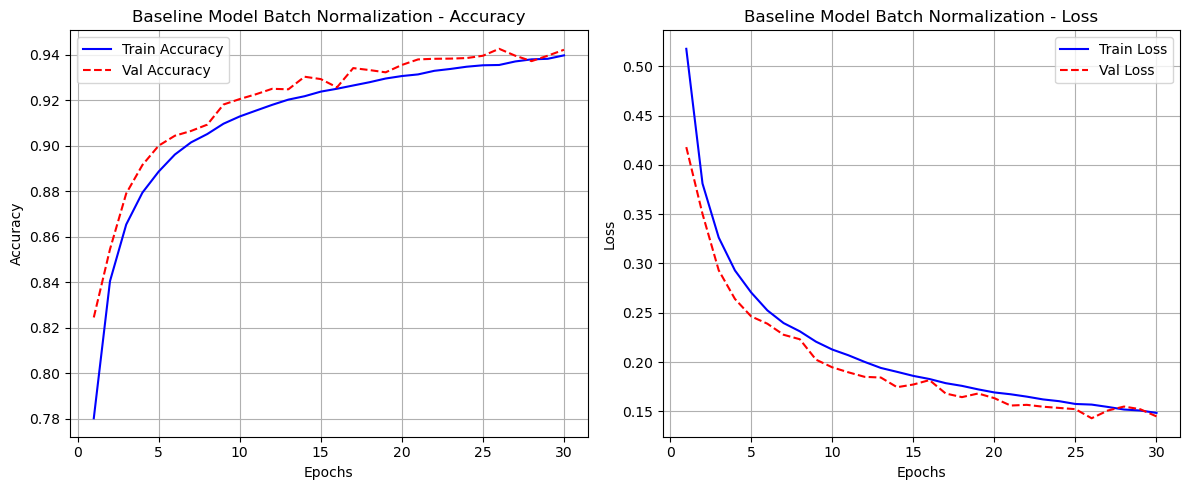

In [31]:
plot_learning_curves(history_baseline_Batch_Norm, title='Baseline Model Batch Normalization')

In [32]:
loss1, acc1 = baseline_model_Batch_Norm.evaluate(X_test, y_test)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9411 - loss: 0.1456
Test accuracy : 94.13%
Test loss     : 14.60%


By adding batch normalization we improve accuracy and rduce loss, and also learning curve is also much better now.


# 3.2 REGULARIZATION TECHNIQUES

Apply Dropout to prevent overfitting and experiment with different dropout rates.

In [33]:
baseline_model_DropOut = Sequential([
    Input(shape=(X_train.shape[1],)),

    Dense(512),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.1),

    Dense(256),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.1),

    Dense(128),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.1),

    Dense(64),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.1),

    Dense(32),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.1),

    Dense(7, activation='softmax')
])

baseline_model_DropOut.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 512)            │        28,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_12 (LeakyReLU)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_13 (LeakyReLU)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,919 (808.28 KB)

 Trainable params: 204,935 (800.53 KB)

 Non-trainable params: 1,984 (7.75 KB)

In [34]:
baseline_model_DropOut.compile(optimizer=Adam(learning_rate=0.01),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

In [35]:
history_baseline_DropOut = baseline_model_DropOut.fit(X_train, y_train,
                                      validation_split=0.2,
                                      epochs=30,
                                      batch_size=256,
                                      verbose=1)

Epoch 1/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.7298 - loss: 0.6470 - val_accuracy: 0.8048 - val_loss: 0.4528
Epoch 2/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8033 - loss: 0.4641 - val_accuracy: 0.8377 - val_loss: 0.3854
Epoch 3/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8284 - loss: 0.4105 - val_accuracy: 0.8556 - val_loss: 0.3432
Epoch 4/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8452 - loss: 0.3758 - val_accuracy: 0.8682 - val_loss: 0.3234
Epoch 5/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8540 - loss: 0.3522 - val_accuracy: 0.8793 - val_loss: 0.2970
Epoch 6/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8629 - loss: 0.3359 - val_accuracy: 0.8828 - val_loss: 0.2835
Epoch 7/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8693 - loss: 0.3174 - val_accuracy: 0.8926 - val_loss: 0.2619
Epoch 8/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8731 - loss: 0

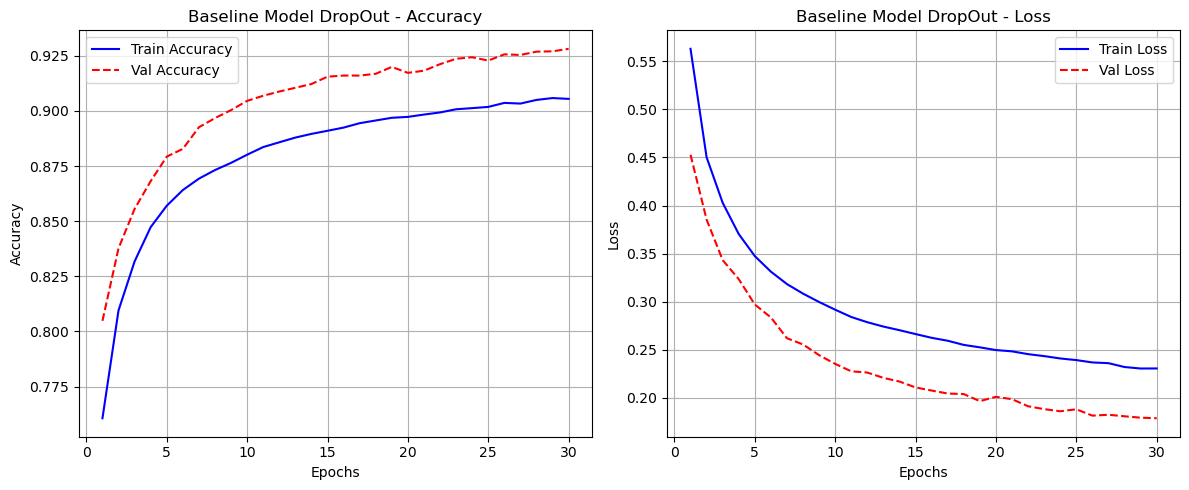

In [36]:
plot_learning_curves(history_baseline_DropOut, title='Baseline Model DropOut')

In [37]:
loss1, acc1 = baseline_model_DropOut.evaluate(X_test, y_test)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9257 - loss: 0.1790
Test accuracy : 92.61%
Test loss     : 17.88%


By adding drop out it reduce the test accuracy and increase the loss. but the curves are better now


Add L2 regularization to Dense layers and

In [38]:
from tensorflow.keras.regularizers import l2

baseline_model_L2_Reg = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(512, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(256, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(128, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(64, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(32, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(7, activation='softmax')

])
baseline_model_L2_Reg.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 512)            │        28,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_14 (LeakyReLU)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_15 (LeakyReLU)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_16 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_17 (LeakyReLU)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_18 (LeakyReLU)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,919 (808.28 KB)

 Trainable params: 204,935 (800.53 KB)

 Non-trainable params: 1,984 (7.75 KB)

In [39]:
baseline_model_L2_Reg.compile(optimizer=Adam(learning_rate=0.01),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

In [40]:
history_baseline_L2_Reg = baseline_model_L2_Reg.fit(X_train, y_train,
                                      validation_split=0.2,
                                      epochs=30,
                                      batch_size=256,
                                      verbose=1)

Epoch 1/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7327 - loss: 0.7236 - val_accuracy: 0.7776 - val_loss: 0.6032
Epoch 2/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7809 - loss: 0.5875 - val_accuracy: 0.7942 - val_loss: 0.5589
Epoch 3/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7980 - loss: 0.5422 - val_accuracy: 0.8084 - val_loss: 0.5225
Epoch 4/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8085 - loss: 0.5193 - val_accuracy: 0.8143 - val_loss: 0.5025
Epoch 5/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8163 - loss: 0.5070 - val_accuracy: 0.8240 - val_loss: 0.4881
Epoch 6/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8187 - loss: 0.4985 - val_accuracy: 0.8284 - val_loss: 0.4838
Epoch 7/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8213 - loss: 0.4959 - val_accuracy: 0.8259 - val_loss: 0.4855
Epoch 8/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8234 - loss: 0

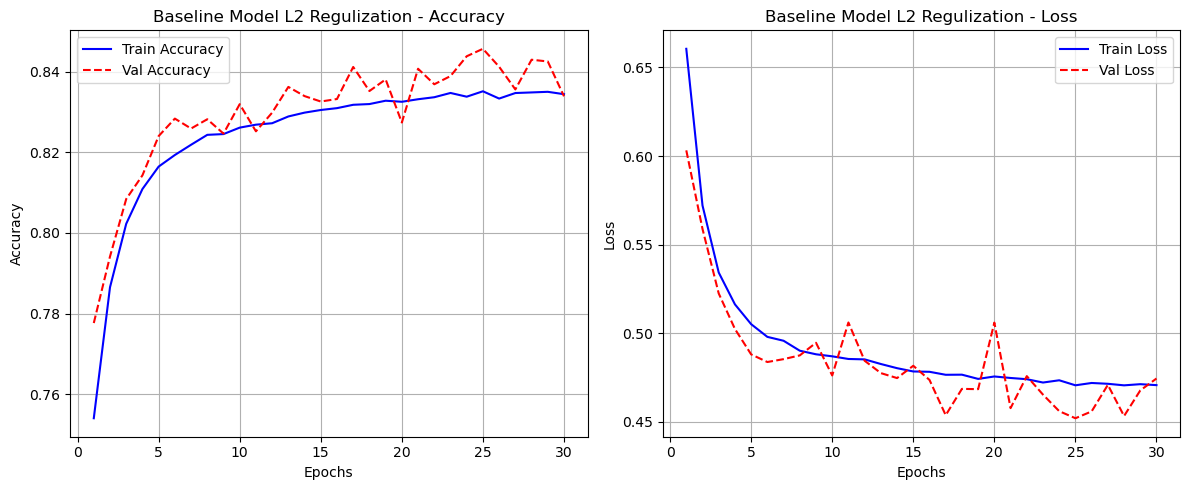

In [41]:
plot_learning_curves(history_baseline_L2_Reg, title='Baseline Model L2 Regulization')

In [42]:
loss1, acc1 = baseline_model_L2_Reg.evaluate(X_test, y_test)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8326 - loss: 0.4768
Test accuracy : 83.27%
Test loss     : 47.64%


Using only L2 regulazatin not fit. it reduce accuracy and increases the loss. model is going underfit.

Lets 1 more test with dropout and l2 regulazation together.

In [43]:
baseline_model_Dropout_L2_Batch = Sequential([
    Input(shape=(X_train.shape[1],)),

    Dense(512, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.1),

    Dense(256, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.1),

    Dense(128, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.1),

    Dense(64, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.1),

    Dense(32, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.1),

    Dense(7, activation='softmax')

])
baseline_model_Dropout_L2_Batch.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 512)            │        28,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_19 (LeakyReLU)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_20 (LeakyReLU)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_21 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_22 (LeakyReLU)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_23 (LeakyReLU)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,919 (808.28 KB)

 Trainable params: 204,935 (800.53 KB)

 Non-trainable params: 1,984 (7.75 KB)

In [44]:

baseline_model_Dropout_L2_Batch.compile(optimizer=Adam(learning_rate=0.001),  # Reduced learning rate
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

In [45]:
history_baseline_Dropout_L2_Batch = baseline_model_Dropout_L2_Batch.fit(X_train, y_train,
                                      validation_split=0.2,
                                      epochs=30,
                                      batch_size=256,
                                      verbose=1)

Epoch 1/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.7119 - loss: 0.8238 - val_accuracy: 0.8078 - val_loss: 0.5232
Epoch 2/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7950 - loss: 0.5487 - val_accuracy: 0.8331 - val_loss: 0.4595
Epoch 3/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8183 - loss: 0.4957 - val_accuracy: 0.8535 - val_loss: 0.4183
Epoch 4/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8334 - loss: 0.4630 - val_accuracy: 0.8609 - val_loss: 0.3983
Epoch 5/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8430 - loss: 0.4430 - val_accuracy: 0.8715 - val_loss: 0.3830
Epoch 6/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8506 - loss: 0.4276 - val_accuracy: 0.8715 - val_loss: 0.3819
Epoch 7/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8563 - loss: 0.4182 - val_accuracy: 0.8796 - val_loss: 0.3645
Epoch 8/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8599 - loss: 0

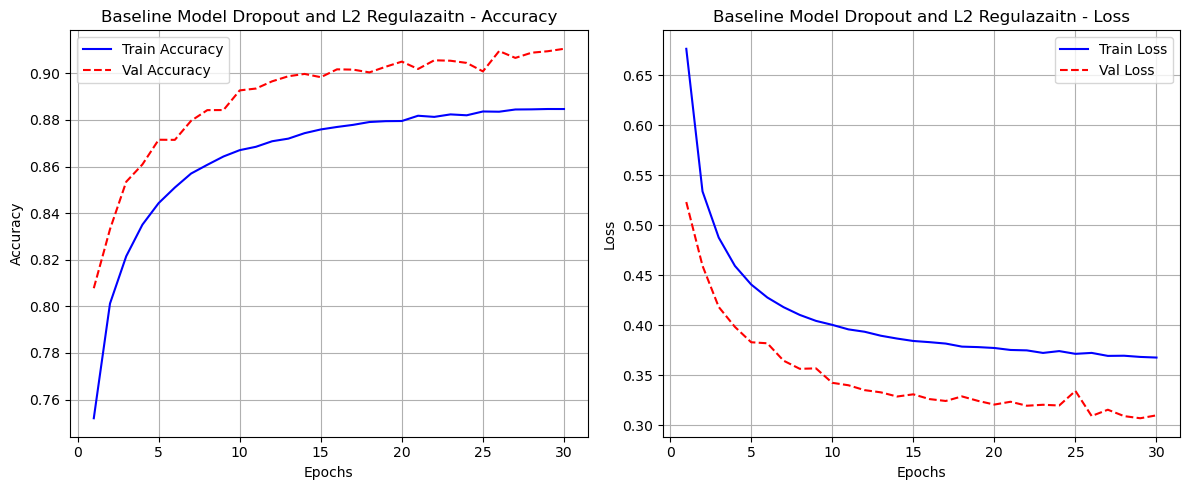

In [46]:
plot_learning_curves(history_baseline_Dropout_L2_Batch, title='Baseline Model Dropout and L2 Regulazaitn')

In [47]:
loss1, acc1 = baseline_model_Dropout_L2_Batch.evaluate(X_test, y_test)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9085 - loss: 0.3101
Test accuracy : 90.93%
Test loss     : 31.03%


The model has a higher loss. for further testing we will not use dropout and l2regulaization. because this is not good for our dataset.

# 3.3 OPTIMIZER AND LEARNING RATE STRATEGY

Try multiple optimizers (e.g., Adam, RMSprop, SGD with momentum).

*  SGD

SGD with different learning rates

In [48]:
# Define function to train model with a given learning rate
def train_with_lr(lr):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),

        Dense(512),
        BatchNormalization(),
        LeakyReLU(alpha=0.01),

        Dense(256),
        BatchNormalization(),
        LeakyReLU(alpha=0.01),

        Dense(128),
        BatchNormalization(),
        LeakyReLU(alpha=0.01),

        Dense(64),
        BatchNormalization(),
        LeakyReLU(alpha=0.01),

        Dense(32),
        BatchNormalization(),
        LeakyReLU(alpha=0.01),

        Dense(7, activation='softmax')
    ])

    model.compile(optimizer=SGD(learning_rate=lr),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train,
                                      validation_split=0.2,
                                      epochs=30,
                                      batch_size=256,
                                      verbose=0)

    return model, history

# learning_rates = [0.0001, 0.001, 0.01, 0.1, 1.0]
learning_rates = [0.1,0.5, 1.0,1.5]
histories = []
models = []

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    model, history = train_with_lr(lr)
    histories.append((lr, history))
    models.append((lr, model))

    final_train_acc = history.history['accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_val_loss = history.history['val_loss'][-1]

    print(f"Final Training Accuracy: {final_train_acc:.4f}")
    print(f"Final Training Loss: {final_train_loss:.4f}")
    print(f"Final Validation Accuracy: {final_val_acc:.4f}")
    print(f"Final Validation Loss: {final_val_loss:.4f}")


Training with learning rate: 0.1
Final Training Accuracy: 0.9356
Final Training Loss: 0.1580
Final Validation Accuracy: 0.9388
Final Validation Loss: 0.1554

Training with learning rate: 0.5
Final Training Accuracy: 0.9384
Final Training Loss: 0.1501
Final Validation Accuracy: 0.9391
Final Validation Loss: 0.1524

Training with learning rate: 1.0
Final Training Accuracy: 0.9382
Final Training Loss: 0.1509
Final Validation Accuracy: 0.9392
Final Validation Loss: 0.1538

Training with learning rate: 1.5
Final Training Accuracy: 0.9368
Final Training Loss: 0.1542
Final Validation Accuracy: 0.9377
Final Validation Loss: 0.1565


SGD with best learning rate

In [49]:
baseline_model_Batch_Norm_SGD = Sequential([
    Input(shape=(X_train.shape[1],)),

    Dense(512),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(256),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(128),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(64),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(32),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(7, activation='softmax')
])

baseline_model_Batch_Norm_SGD.summary()

baseline_model_Batch_Norm_SGD.compile(optimizer=SGD(learning_rate=0.5),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

history_baseline_Batch_Norm_SGD = baseline_model_Batch_Norm_SGD.fit(X_train, y_train,
                                      validation_split=0.2,
                                      epochs=30,
                                      batch_size=256,
                                      verbose=1)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_62 (Dense)                │ (None, 512)            │        28,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_44 (LeakyReLU)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_45 (LeakyReLU)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_46 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_47 (LeakyReLU)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_48 (LeakyReLU)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,919 (808.28 KB)

 Trainable params: 204,935 (800.53 KB)

 Non-trainable params: 1,984 (7.75 KB)

Epoch 1/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7519 - loss: 0.5880 - val_accuracy: 0.8028 - val_loss: 0.4704
Epoch 2/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8369 - loss: 0.3879 - val_accuracy: 0.8580 - val_loss: 0.3412
Epoch 3/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8618 - loss: 0.3319 - val_accuracy: 0.8700 - val_loss: 0.3055
Epoch 4/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8777 - loss: 0.2947 - val_accuracy: 0.8705 - val_loss: 0.3186
Epoch 5/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8870 - loss: 0.2737 - val_accuracy: 0.8892 - val_loss: 0.2732
Epoch 6/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8940 - loss: 0.2554 - val_accuracy: 0.9016 - val_loss: 0.2416
Epoch 7/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8997 - loss: 0.2429 - val_accuracy: 0.9058 - val_loss: 0.2302
Epoch 8/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9053 - loss: 0

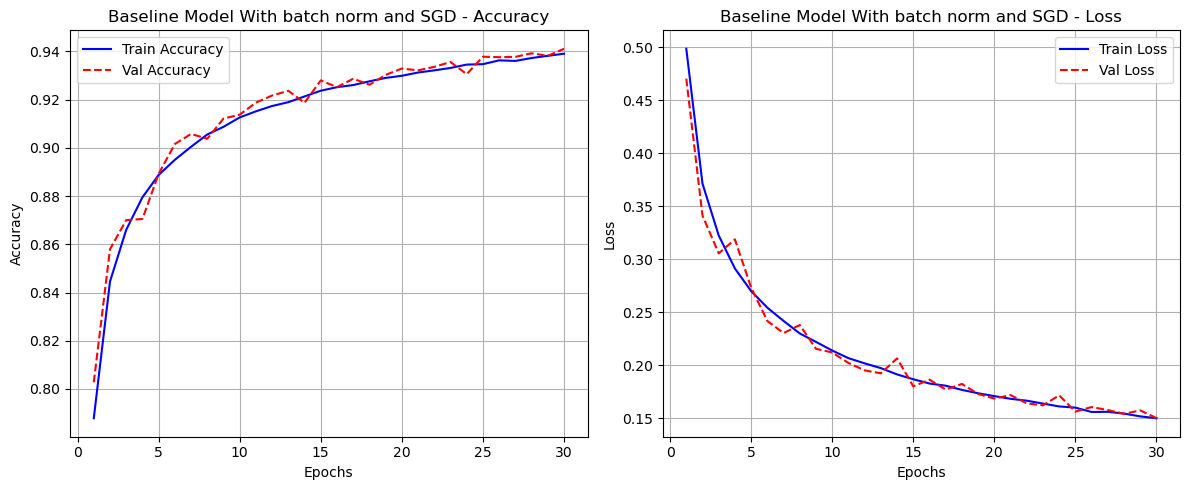

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9397 - loss: 0.1529
Test accuracy : 93.99%
Test loss     : 15.09%


In [50]:
plot_learning_curves(history_baseline_Batch_Norm_SGD, title='Baseline Model With batch norm and SGD')

loss1, acc1 = baseline_model_Batch_Norm_SGD.evaluate(X_test, y_test)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

Now lets try momentum with SGD +  Batch normalization

In [51]:
# Function to train the model with a given momentum value
def train_with_momentum(momentum):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),

        Dense(512),
        BatchNormalization(),
        LeakyReLU(alpha=0.01),

        Dense(256),
        BatchNormalization(),
        LeakyReLU(alpha=0.01),

        Dense(128),
        BatchNormalization(),
        LeakyReLU(alpha=0.01),

        Dense(64),
        BatchNormalization(),
        LeakyReLU(alpha=0.01),

        Dense(32),
        BatchNormalization(),
        LeakyReLU(alpha=0.01),

        Dense(7, activation='softmax')
    ])

    optimizer = SGD(learning_rate=0.5, momentum=momentum)

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train,
                        validation_split=0.2,
                        epochs=30,
                        batch_size=256,
                        verbose=0)

    return model, history

# Test different momentum values
momentum_values = [0.2,0.3,0.4,0.7, 0.9]
histories = []
models = []

for momentum in momentum_values:
    print(f"\nTraining with momentum: {momentum}")
    model, history = train_with_momentum(momentum)
    histories.append((momentum, history))
    models.append((momentum, model))

    final_train_acc = history.history['accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_val_loss = history.history['val_loss'][-1]

    print(f"Final Training Accuracy: {final_train_acc:.4f}")
    print(f"Final Training Loss: {final_train_loss:.4f}")
    print(f"Final Validation Accuracy: {final_val_acc:.4f}")
    print(f"Final Validation Loss: {final_val_loss:.4f}")


Training with momentum: 0.2
Final Training Accuracy: 0.9386
Final Training Loss: 0.1499
Final Validation Accuracy: 0.9394
Final Validation Loss: 0.1500

Training with momentum: 0.3
Final Training Accuracy: 0.9387
Final Training Loss: 0.1499
Final Validation Accuracy: 0.9396
Final Validation Loss: 0.1531

Training with momentum: 0.4
Final Training Accuracy: 0.9389
Final Training Loss: 0.1503
Final Validation Accuracy: 0.9411
Final Validation Loss: 0.1487

Training with momentum: 0.7
Final Training Accuracy: 0.9380
Final Training Loss: 0.1510
Final Validation Accuracy: 0.9386
Final Validation Loss: 0.1544

Training with momentum: 0.9
Final Training Accuracy: 0.9329
Final Training Loss: 0.1630
Final Validation Accuracy: 0.9330
Final Validation Loss: 0.1670


SGD with best learning rate and Best Momentum


In [52]:
baseline_model_Batch_Norm_SGD_Momentum = Sequential([
    Input(shape=(X_train.shape[1],)),

    Dense(512),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(256),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(128),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(64),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(32),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(7, activation='softmax')
])

baseline_model_Batch_Norm_SGD_Momentum.summary()

baseline_model_Batch_Norm_SGD_Momentum.compile(optimizer=SGD(learning_rate=0.5, momentum=0.2),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

history_baseline_Batch_Norm_SGD_Momentum = baseline_model_Batch_Norm_SGD_Momentum.fit(X_train, y_train,
                                      validation_split=0.2,
                                      epochs=30,
                                      batch_size=256,
                                      verbose=1)

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_98 (Dense)                │ (None, 512)            │        28,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_70          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_74 (LeakyReLU)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_71          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_75 (LeakyReLU)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_72          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_76 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_73          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_77 (LeakyReLU)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_102 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_74          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_78 (LeakyReLU)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,919 (808.28 KB)

 Trainable params: 204,935 (800.53 KB)

 Non-trainable params: 1,984 (7.75 KB)

Epoch 1/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7544 - loss: 0.5813 - val_accuracy: 0.8300 - val_loss: 0.4215
Epoch 2/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8379 - loss: 0.3859 - val_accuracy: 0.8570 - val_loss: 0.3471
Epoch 3/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8647 - loss: 0.3262 - val_accuracy: 0.8740 - val_loss: 0.3103
Epoch 4/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8787 - loss: 0.2919 - val_accuracy: 0.8791 - val_loss: 0.2896
Epoch 5/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8882 - loss: 0.2699 - val_accuracy: 0.8976 - val_loss: 0.2502
Epoch 6/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8956 - loss: 0.2532 - val_accuracy: 0.9006 - val_loss: 0.2461
Epoch 7/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9012 - loss: 0.2405 - val_accuracy: 0.9081 - val_loss: 0.2240
Epoch 8/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9058 - loss: 0

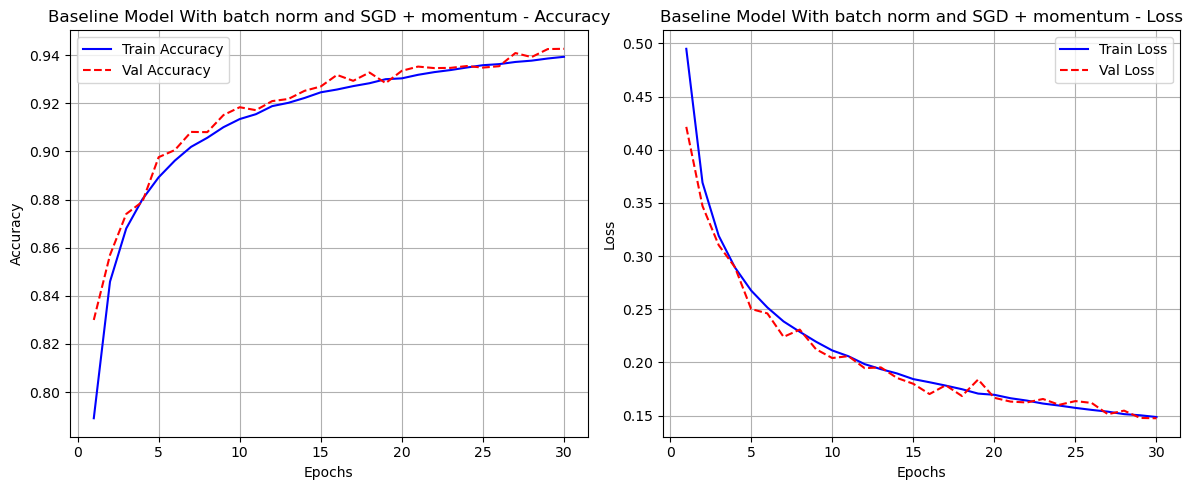

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9413 - loss: 0.1476
Test accuracy : 94.21%
Test loss     : 14.81%


In [53]:
plot_learning_curves(history_baseline_Batch_Norm_SGD_Momentum, title='Baseline Model With batch norm and SGD + momentum')

loss1, acc1 = baseline_model_Batch_Norm_SGD_Momentum.evaluate(X_test, y_test)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

Try different learning rates for Adam


In [54]:
# Define function to train model with a given learning rate
def train_Adam_with_lr(lr):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),

        Dense(512),
        BatchNormalization(),
        LeakyReLU(alpha=0.01),

        Dense(256),
        BatchNormalization(),
        LeakyReLU(alpha=0.01),

        Dense(128),
        BatchNormalization(),
        LeakyReLU(alpha=0.01),

        Dense(64),
        BatchNormalization(),
        LeakyReLU(alpha=0.01),

        Dense(32),
        BatchNormalization(),
        LeakyReLU(alpha=0.01),

        Dense(7, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=lr),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train,
                                      validation_split=0.2,
                                      epochs=30,
                                      batch_size=256,
                                      verbose=0)

    return model, history

learning_rates = [0.0001, 0.001, 0.01, 0.1, 1.0]
histories = []
models = []

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    model, history = train_Adam_with_lr(lr)
    histories.append((lr, history))
    models.append((lr, model))

    final_train_acc = history.history['accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_val_loss = history.history['val_loss'][-1]

    print(f"Final Training Accuracy: {final_train_acc:.4f}")
    print(f"Final Training Loss: {final_train_loss:.4f}")
    print(f"Final Validation Accuracy: {final_val_acc:.4f}")
    print(f"Final Validation Loss: {final_val_loss:.4f}")


Training with learning rate: 0.0001
Final Training Accuracy: 0.9212
Final Training Loss: 0.1939
Final Validation Accuracy: 0.9275
Final Validation Loss: 0.1845

Training with learning rate: 0.001
Final Training Accuracy: 0.9401
Final Training Loss: 0.1473
Final Validation Accuracy: 0.9435
Final Validation Loss: 0.1429

Training with learning rate: 0.01
Final Training Accuracy: 0.9384
Final Training Loss: 0.1498
Final Validation Accuracy: 0.9409
Final Validation Loss: 0.1483

Training with learning rate: 0.1
Final Training Accuracy: 0.9242
Final Training Loss: 0.1858
Final Validation Accuracy: 0.9343
Final Validation Loss: 0.1671

Training with learning rate: 1.0
Final Training Accuracy: 0.8420
Final Training Loss: 0.5900
Final Validation Accuracy: 0.8656
Final Validation Loss: 0.3489


Adam with best learning rate

In [55]:
baseline_model_Batch_Norm_Adam = Sequential([
    Input(shape=(X_train.shape[1],)),

    Dense(512),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(256),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(128),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(64),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(32),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(7, activation='softmax')
])

baseline_model_Batch_Norm_Adam.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_134 (Dense)               │ (None, 512)            │        28,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_100         │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_104 (LeakyReLU)     │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_135 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_101         │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_105 (LeakyReLU)     │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_136 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_102         │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_106 (LeakyReLU)     │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_137 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_103         │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_107 (LeakyReLU)     │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_138 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_104         │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_108 (LeakyReLU)     │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_139 (Dense)               │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,919 (808.28 KB)

 Trainable params: 204,935 (800.53 KB)

 Non-trainable params: 1,984 (7.75 KB)

In [56]:
baseline_model_Batch_Norm_Adam.compile(optimizer=Adam(learning_rate=0.001),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

In [57]:
history_baseline_model_Batch_Norm_Adam = baseline_model_Batch_Norm_Adam.fit(X_train, y_train,
                                      validation_split=0.2,
                                      epochs=30,
                                      batch_size=256,
                                      verbose=1)

Epoch 1/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7478 - loss: 0.6590 - val_accuracy: 0.8355 - val_loss: 0.3952
Epoch 2/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8408 - loss: 0.3826 - val_accuracy: 0.8673 - val_loss: 0.3253
Epoch 3/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8688 - loss: 0.3176 - val_accuracy: 0.8842 - val_loss: 0.2794
Epoch 4/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8843 - loss: 0.2812 - val_accuracy: 0.8943 - val_loss: 0.2600
Epoch 5/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8933 - loss: 0.2600 - val_accuracy: 0.9057 - val_loss: 0.2370
Epoch 6/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9003 - loss: 0.2434 - val_accuracy: 0.9065 - val_loss: 0.2287
Epoch 7/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9048 - loss: 0.2322 - val_accuracy: 0.9144 - val_loss: 0.2149
Epoch 8/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9103 - loss: 0

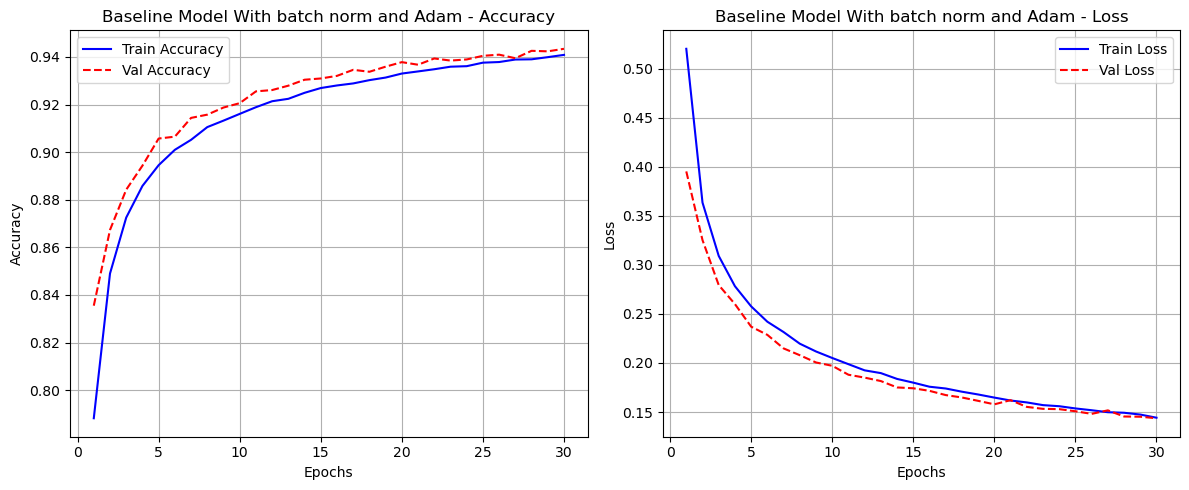

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9425 - loss: 0.1446
Test accuracy : 94.25%
Test loss     : 14.47%


In [58]:
plot_learning_curves(history_baseline_model_Batch_Norm_Adam, title='Baseline Model With batch norm and Adam')

loss1, acc1 = baseline_model_Batch_Norm_Adam.evaluate(X_test, y_test)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

So Adam performs best we will use this model for further experiments


* Use learning rate scheduling strategies like ReduceLROnPlateau.


In [59]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6)

In [60]:
baseline_model_Batch_Norm_Adam_callbacks = Sequential([
    Input(shape=(X_train.shape[1],)),

    Dense(512),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(256),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(128),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(64),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(32),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(7, activation='softmax')
])

baseline_model_Batch_Norm_Adam_callbacks.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_140 (Dense)               │ (None, 512)            │        28,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_105         │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_109 (LeakyReLU)     │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_141 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_106         │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_110 (LeakyReLU)     │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_142 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_107         │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_111 (LeakyReLU)     │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_143 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_108         │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_112 (LeakyReLU)     │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_144 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_109         │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_113 (LeakyReLU)     │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_145 (Dense)               │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,919 (808.28 KB)

 Trainable params: 204,935 (800.53 KB)

 Non-trainable params: 1,984 (7.75 KB)

In [61]:
baseline_model_Batch_Norm_Adam_callbacks.compile(optimizer=Adam(learning_rate=0.001),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

In [62]:
history_baseline_model_Batch_Norm_Adam_callbacks = baseline_model_Batch_Norm_Adam_callbacks.fit(X_train, y_train,
                                      validation_split=0.2,
                                      epochs=30,
                                      batch_size=256,
                                      callbacks=[reduce_lr],
                                      verbose=1)

Epoch 1/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7362 - loss: 0.7264 - val_accuracy: 0.8322 - val_loss: 0.4008 - learning_rate: 0.0010
Epoch 2/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8432 - loss: 0.3784 - val_accuracy: 0.8698 - val_loss: 0.3196 - learning_rate: 0.0010
Epoch 3/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8701 - loss: 0.3152 - val_accuracy: 0.8808 - val_loss: 0.2888 - learning_rate: 0.0010
Epoch 4/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8837 - loss: 0.2850 - val_accuracy: 0.8975 - val_loss: 0.2547 - learning_rate: 0.0010
Epoch 5/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8925 - loss: 0.2620 - val_accuracy: 0.9000 - val_loss: 0.2464 - learning_rate: 0.0010
Epoch 6/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8996 - loss: 0.2443 - val_accuracy: 0.9078 - val_loss: 0.2296 - learning_rate: 0.0010
Epoch 7/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9

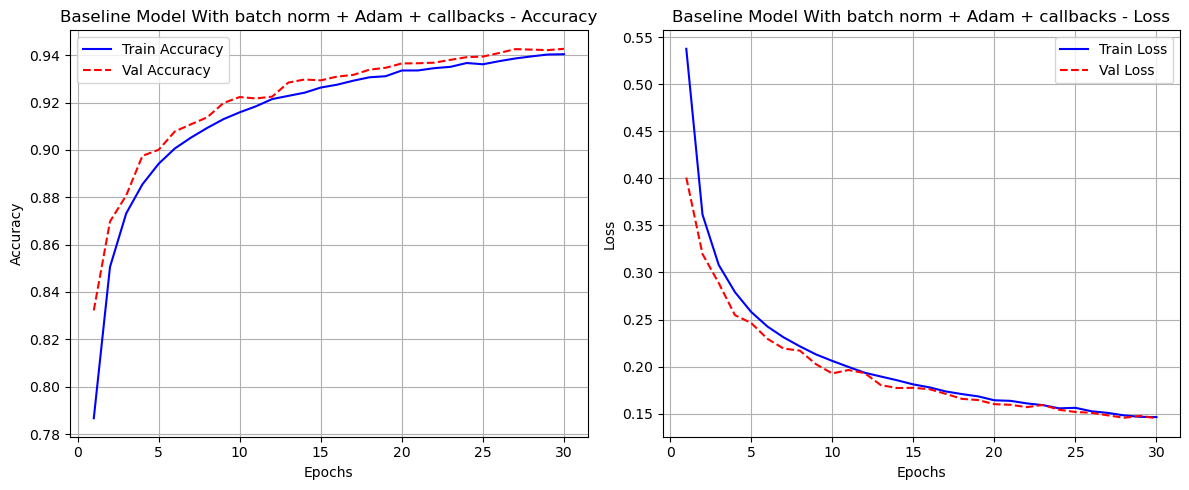

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9419 - loss: 0.1460
Test accuracy : 94.18%
Test loss     : 14.78%


In [63]:
plot_learning_curves(history_baseline_model_Batch_Norm_Adam_callbacks, title='Baseline Model With batch norm + Adam + callbacks')

loss1, acc1 = baseline_model_Batch_Norm_Adam_callbacks.evaluate(X_test, y_test)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

#3.4 TRAINING MANAGEMENT

* Integrate EarlyStopping to halt training when validation performance stops improving.
* Log training and validation performance per epoch.

In [64]:
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6)

In [65]:
baseline_model_Batch_Norm_Adam_callbacks_moreEpochs = Sequential([
    Input(shape=(X_train.shape[1],)),

    Dense(512),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(256),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(128),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(64),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(32),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    Dense(7, activation='softmax')
])

baseline_model_Batch_Norm_Adam_callbacks_moreEpochs.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_146 (Dense)               │ (None, 512)            │        28,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_110         │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_114 (LeakyReLU)     │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_147 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_111         │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_115 (LeakyReLU)     │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_148 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_112         │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_116 (LeakyReLU)     │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_149 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_113         │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_117 (LeakyReLU)     │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_150 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_114         │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_118 (LeakyReLU)     │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_151 (Dense)               │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,919 (808.28 KB)

 Trainable params: 204,935 (800.53 KB)

 Non-trainable params: 1,984 (7.75 KB)

In [66]:
baseline_model_Batch_Norm_Adam_callbacks_moreEpochs.compile(optimizer=Adam(learning_rate=0.001),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

In [67]:
history_baseline_model_Batch_Norm_Adam_callbacks_moreEpochs = baseline_model_Batch_Norm_Adam_callbacks_moreEpochs.fit(X_train, y_train,
                                      validation_split=0.2,
                                      epochs=100,
                                      batch_size=256,
                                      callbacks=[reduce_lr, checkpoint, early_stop],
                                      verbose=1)

Epoch 1/100
1447/1453 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7531 - loss: 0.6383
Epoch 1: val_loss improved from inf to 0.40159, saving model to best_model.keras
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7533 - loss: 0.6377 - val_accuracy: 0.8338 - val_loss: 0.4016 - learning_rate: 0.0010
Epoch 2/100
1448/1453 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8434 - loss: 0.3776
Epoch 2: val_loss improved from 0.40159 to 0.31387, saving model to best_model.keras
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8434 - loss: 0.3776 - val_accuracy: 0.8707 - val_loss: 0.3139 - learning_rate: 0.0010
Epoch 3/100
1447/1453 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8702 - loss: 0.3171
Epoch 3: val_loss improved from 0.31387 to 0.28402, saving model to best_model.keras
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8702 - loss: 0.3170 - val_accuracy: 0.8836 - val_loss: 0.2840 - learning_rate: 0.0010
Epoch 4/100
1448/1453 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/

* Visualize training curves (accuracy and loss).

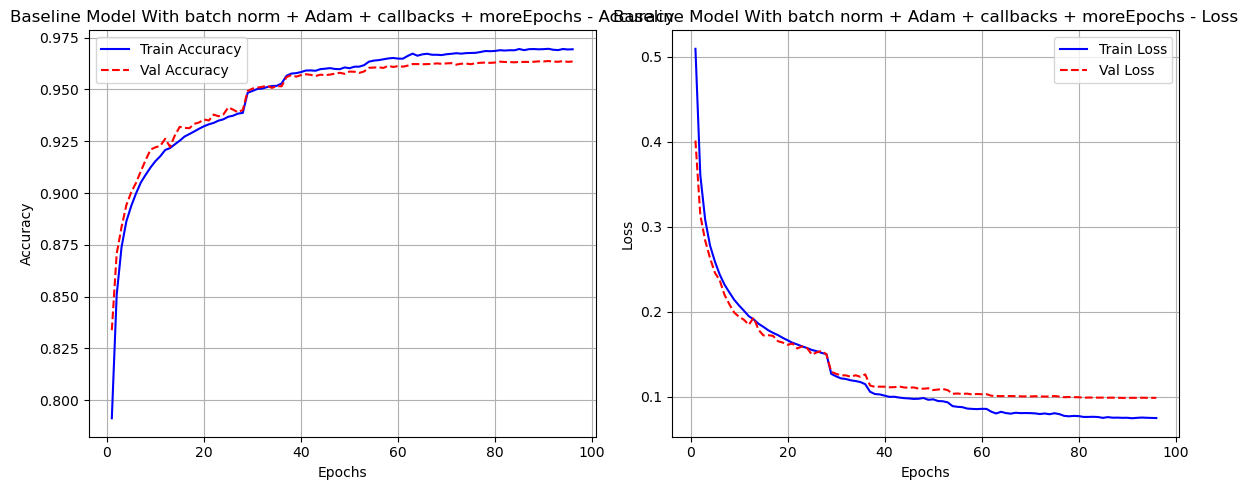

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9628 - loss: 0.0977
Test accuracy : 96.26%
Test loss     : 9.94%


In [68]:
plot_learning_curves(history_baseline_model_Batch_Norm_Adam_callbacks_moreEpochs, title='Baseline Model With batch norm + Adam + callbacks + moreEpochs')

loss1, acc1 = baseline_model_Batch_Norm_Adam_callbacks_moreEpochs.evaluate(X_test, y_test)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

Just a practice
Apply regularization to reduce overfitting

In [69]:
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6)

In [70]:
baseline_model_Batch_Norm_Adam_callbacks_moreEpochs_Regularization = Sequential([
    Input(shape=(X_train.shape[1],)),

    Dense(512, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.1),

    Dense(256, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.1),

    Dense(128, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.1),

    Dense(64, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.1),

    Dense(32, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.1),

    Dense(7, activation='softmax')
])

baseline_model_Batch_Norm_Adam_callbacks_moreEpochs_Regularization.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_152 (Dense)               │ (None, 512)            │        28,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_115         │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_119 (LeakyReLU)     │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_116         │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_120 (LeakyReLU)     │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_117         │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_121 (LeakyReLU)     │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_155 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_118         │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_122 (LeakyReLU)     │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_156 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_119         │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_123 (LeakyReLU)     │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_157 (Dense)               │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,919 (808.28 KB)

 Trainable params: 204,935 (800.53 KB)

 Non-trainable params: 1,984 (7.75 KB)

In [71]:
baseline_model_Batch_Norm_Adam_callbacks_moreEpochs_Regularization.compile(optimizer=Adam(learning_rate=0.001),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

In [72]:
history_baseline_model_Batch_Norm_Adam_callbacks_moreEpochs_Regularization = baseline_model_Batch_Norm_Adam_callbacks_moreEpochs_Regularization.fit(X_train, y_train,
                                      validation_split=0.2,
                                      epochs=100,
                                      batch_size=256,
                                      callbacks=[reduce_lr, checkpoint, early_stop],
                                      verbose=1)

Epoch 1/100
1450/1453 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6794 - loss: 0.9389
Epoch 1: val_loss improved from inf to 0.52247, saving model to best_model.keras
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.6796 - loss: 0.9383 - val_accuracy: 0.8079 - val_loss: 0.5225 - learning_rate: 0.0010
Epoch 2/100
1447/1453 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7956 - loss: 0.5475
Epoch 2: val_loss improved from 0.52247 to 0.45181, saving model to best_model.keras
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7957 - loss: 0.5475 - val_accuracy: 0.8374 - val_loss: 0.4518 - learning_rate: 0.0010
Epoch 3/100
1447/1453 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8188 - loss: 0.4912
Epoch 3: val_loss improved from 0.45181 to 0.42376, saving model to best_model.keras
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8188 - loss: 0.4911 - val_accuracy: 0.8480 - val_loss: 0.4238 - learning_rate: 0.0010
Epoch 4/100
1450/1453 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/

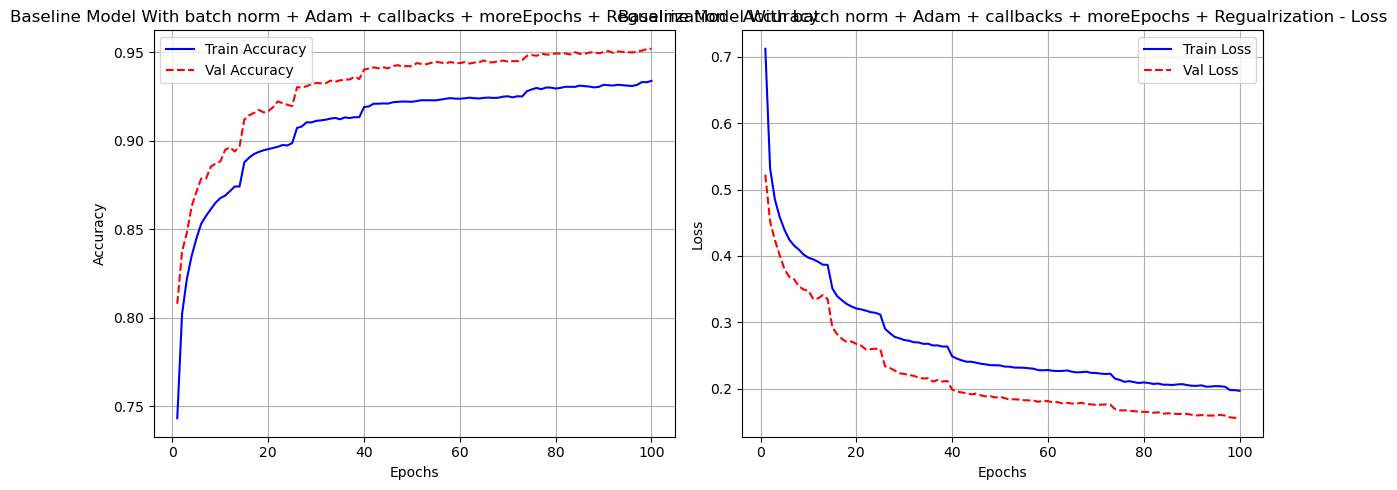

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9500 - loss: 0.1572
Test accuracy : 95.03%
Test loss     : 15.75%


In [73]:
plot_learning_curves(history_baseline_model_Batch_Norm_Adam_callbacks_moreEpochs_Regularization, title='Baseline Model With batch norm + Adam + callbacks + moreEpochs + Regualrization')

loss1, acc1 = baseline_model_Batch_Norm_Adam_callbacks_moreEpochs_Regularization.evaluate(X_test, y_test)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

#3.5 MODEL EVALUATION

* Accuracy
* Precision, Recall, and F1-score (both macro and weighted)

In [74]:
models_dict = {
    "Baseline": baseline_model,
    "More Layers": baseline_model_more_layers,
    "LeakyReLU": baseline_model_LeakyReLU,
    "BatchNorm": baseline_model_Batch_Norm,
    "Dropout": baseline_model_DropOut,
    "L2 Regularized": baseline_model_L2_Reg,
    "Dropout + L2 + BatchNorm": baseline_model_Dropout_L2_Batch,
    "BatchNorm + SGD": baseline_model_Batch_Norm_SGD,
    "BatchNorm + Adam": baseline_model_Batch_Norm_Adam,
    "BatchNorm + Adam + callbacks": baseline_model_Batch_Norm_Adam_callbacks,
    "BatchNorm + Adam + callbacks + MoreEpochs": baseline_model_Batch_Norm_Adam_callbacks_moreEpochs,
    "BatchNorm + Adam + callbacks + MoreEpochs + Regularization": baseline_model_Batch_Norm_Adam_callbacks_moreEpochs_Regularization
}
histories = {
    "Baseline": history_baseline,
    "More Layers": history_baseline_more_layers,
    "LeakyReLU": history_baseline_LeakyReLU,
    "BatchNorm": history_baseline_Batch_Norm,
    "Dropout": history_baseline_DropOut,
    "L2 Regularized": history_baseline_L2_Reg,
    "Dropout + L2 + BatchNorm": history_baseline_Dropout_L2_Batch,
    "BatchNorm + SGD": history_baseline_Batch_Norm_SGD,
    "BatchNorm + Adam": history_baseline_model_Batch_Norm_Adam,
    "BatchNorm + Adam + callbacks": history_baseline_model_Batch_Norm_Adam_callbacks,
    "BatchNorm + Adam + callbacks + MoreEpochs": history_baseline_model_Batch_Norm_Adam_callbacks_moreEpochs,
    "BatchNorm + Adam + callbacks + MoreEpochs + Regularization": history_baseline_model_Batch_Norm_Adam_callbacks_moreEpochs_Regularization
}

In [75]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
results = []

for name, model in models_dict.items():
    history = histories[name]
    num_epochs = len(history.epoch)

    # Evaluate accuracy & loss
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    # Predict and calculate metrics
    y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

    # Get last training and validation accuracy from history
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]

    # Determine overfitting and underfitting (you can adjust these thresholds)
    overfitting = (train_acc - val_acc) > 0.015
    underfitting = (train_acc < 0.85) and (val_acc < 0.85)

    # Append result
    results.append({
        'Model': name,
        'Epochs Trained': num_epochs,
        'Test Accuracy': test_acc,
        'Test Loss': test_loss,
        'Precision (Macro)': report['macro avg']['precision'],
        'Recall (Macro)': report['macro avg']['recall'],
        'F1-score (Macro)': report['macro avg']['f1-score'],
        'Precision (Weighted)': report['weighted avg']['precision'],
        'Recall (Weighted)': report['weighted avg']['recall'],
        'F1-score (Weighted)': report['weighted avg']['f1-score'],
        'Overfitting': overfitting,
        'Underfitting': underfitting
    })



In [77]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Test Accuracy", ascending=False)
results_df


,Model,Epochs Trained,Test Accuracy,Test Loss,Precision (Macro),Recall (Macro),F1-score (Macro),Precision (Weighted),Recall (Weighted),F1-score (Weighted),Overfitting,Underfitting
10,BatchNorm + Adam + callbacks + MoreEpochs,96,0.962643,0.099399,0.936941,0.939241,0.938084,0.962657,0.962643,0.962648,False,False
11,BatchNorm + Adam + callbacks + MoreEpochs + Re...,100,0.950337,0.157503,0.918920,0.923366,0.921102,0.950391,0.950337,0.950341,False,False
8,BatchNorm + Adam,30,0.942480,0.144719,0.905359,0.904890,0.905056,0.942493,0.942480,0.942463,False,False
9,BatchNorm + Adam + callbacks,30,0.941757,0.147838,0.911914,0.896044,0.903248,0.941694,0.941757,0.941610,False,False
3,BatchNorm,30,0.941284,0.146015,0.907119,0.904969,0.905892,0.941294,0.941284,0.941266,False,False
7,BatchNorm + SGD,30,0.939855,0.150853,0.885288,0.912304,0.896941,0.940287,0.939855,0.939984,False,False
4,Dropout,30,0.926138,0.178811,0.898276,0.865016,0.880520,0.926289,0.926138,0.925835,False,False
2,LeakyReLU,30,0.915983,0.218551,0.891637,0.801713,0.830720,0.918551,0.915983,0.915725,False,False
6,Dropout + L2 + BatchNorm,30,0.909331,0.310314,0.854754,0.849813,0.851925,0.909328,0.909331,0.909249,False,False
1,More Layers,30,0.889022,0.301359,0.813135,0.770120,0.786644,0.888540,0.889022,0.887538,False,False


* Confusion Matrix for detailed error analysis

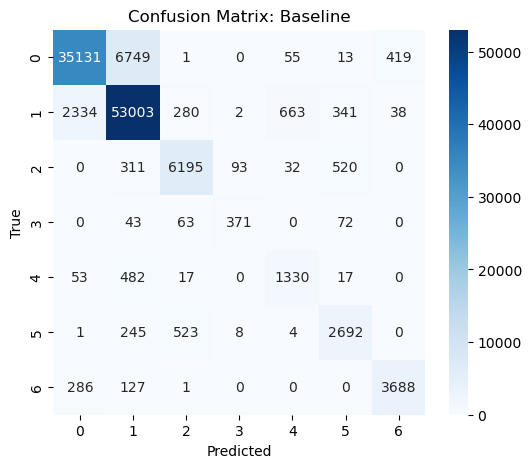

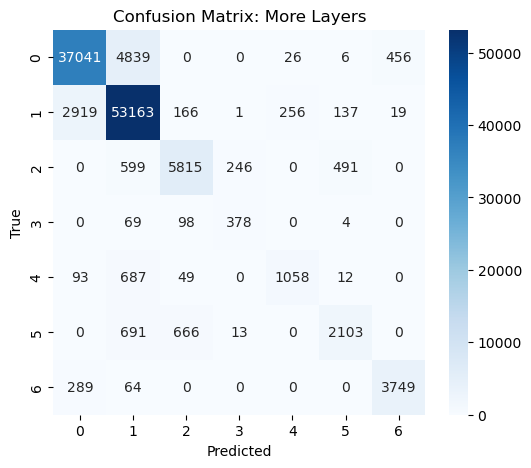

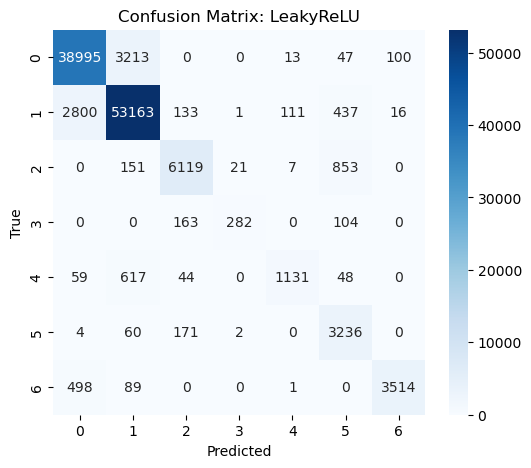

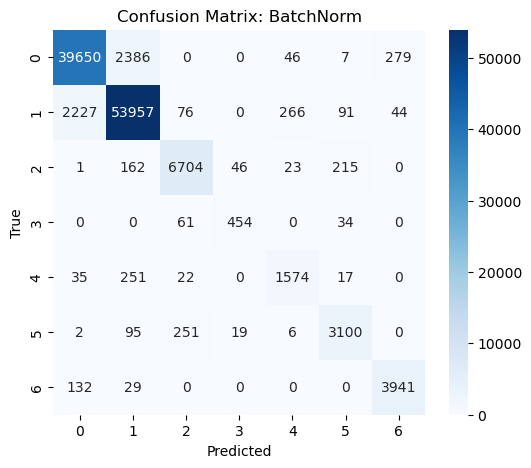

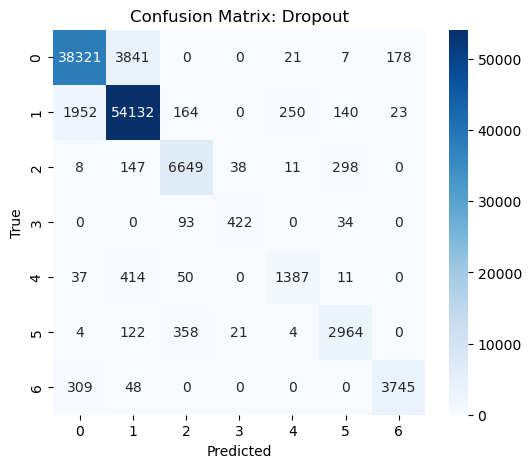

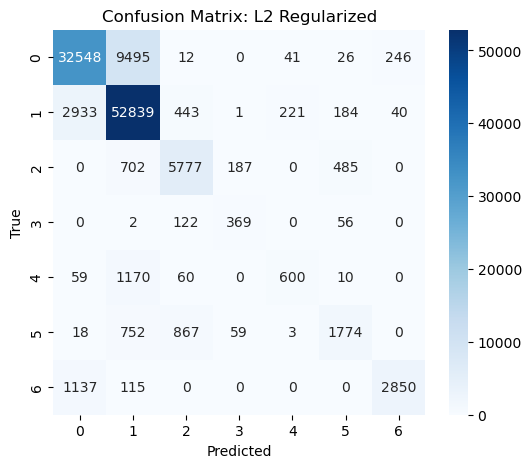

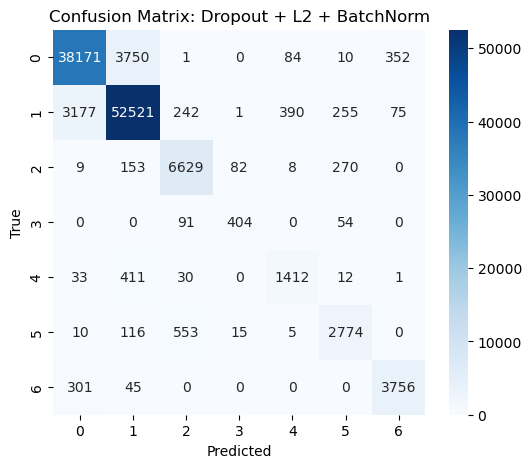

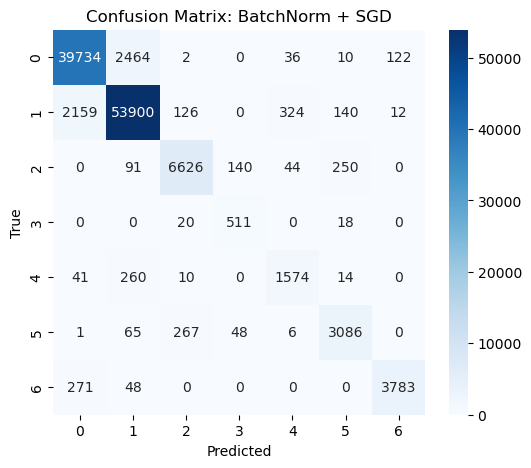

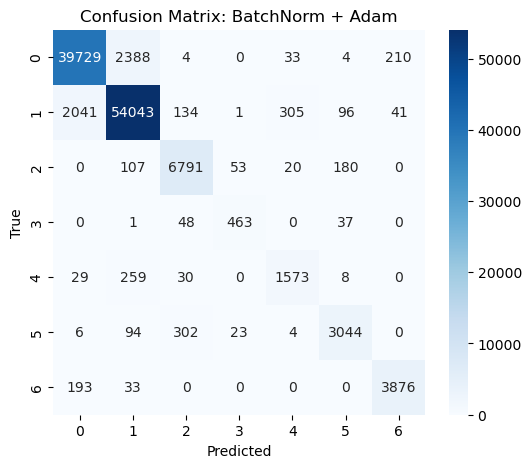

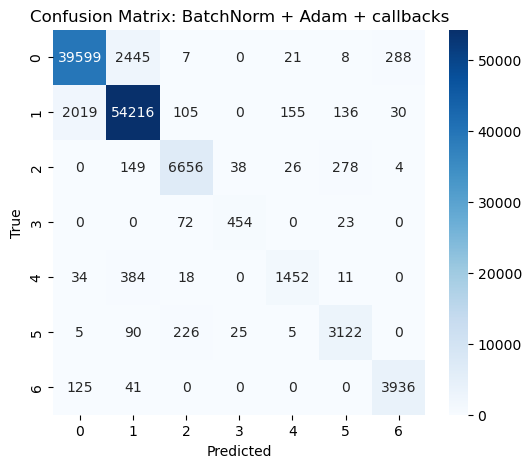

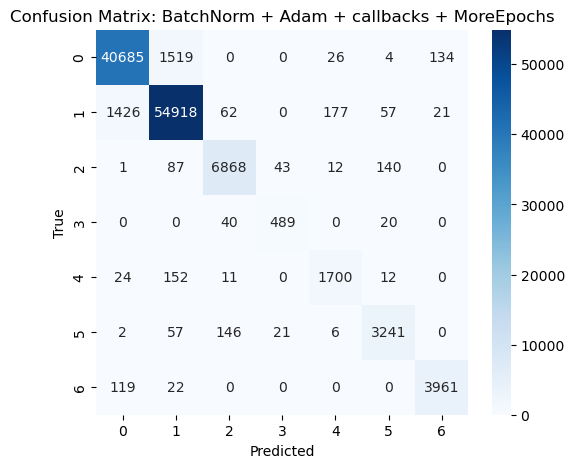

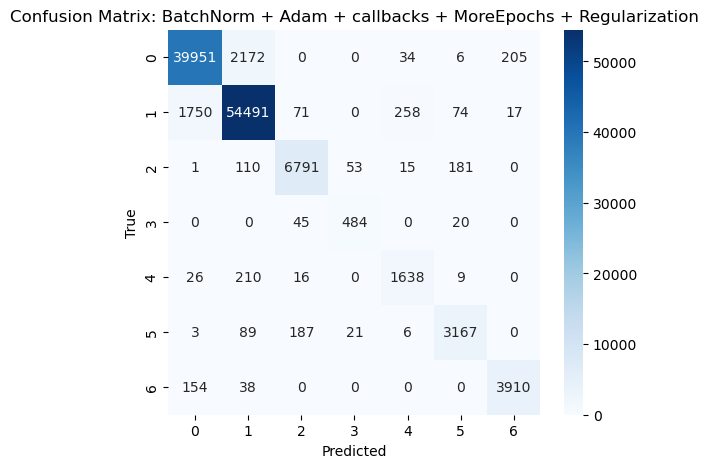

In [78]:
for name, model in models_dict.items():
    y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


* Visualized learning curves for training and validation

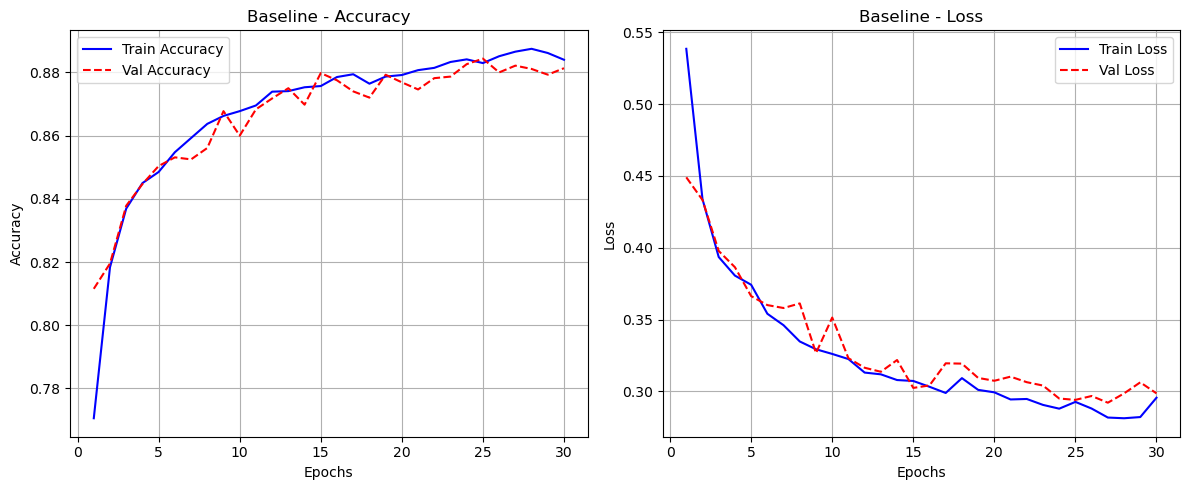

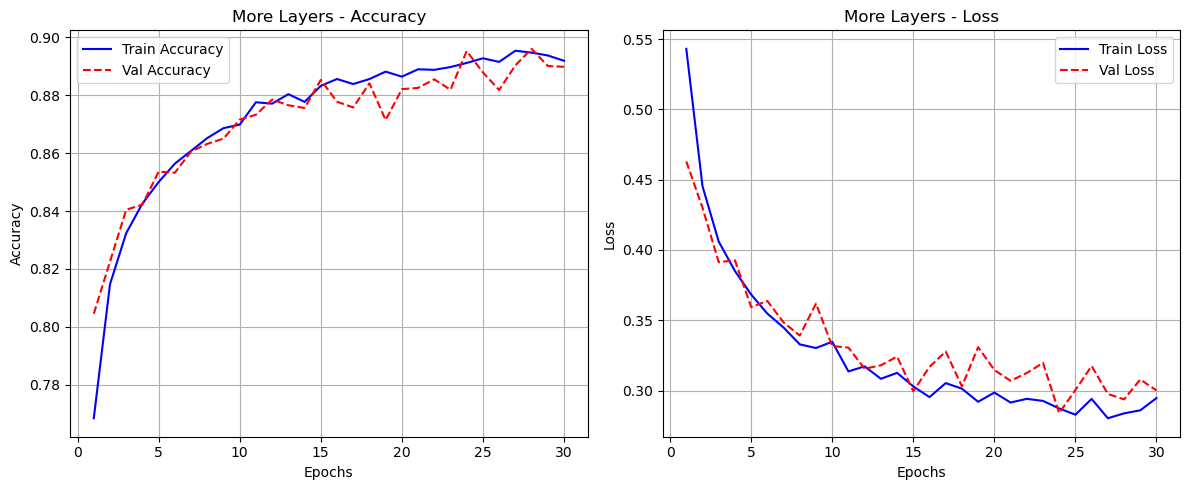

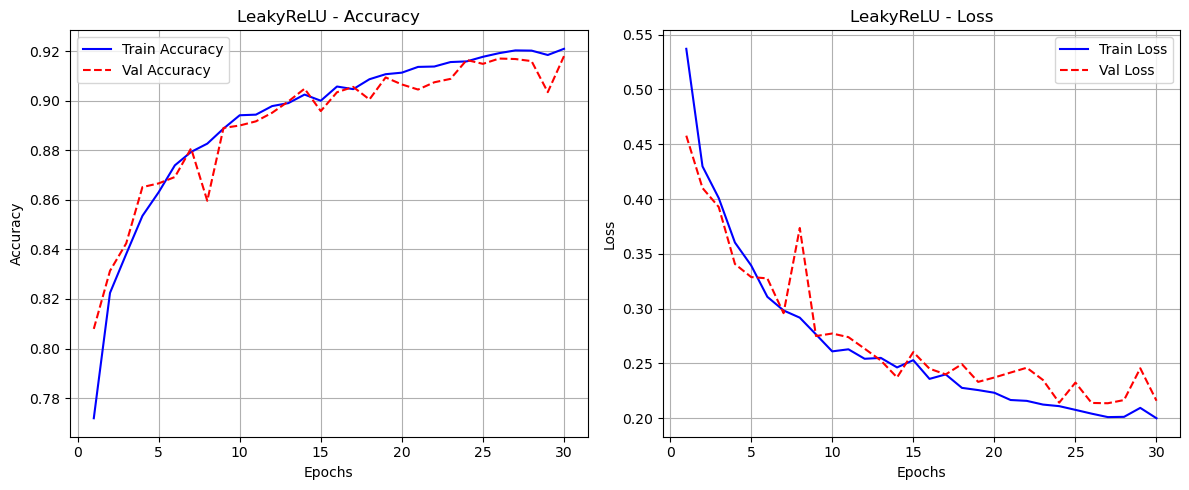

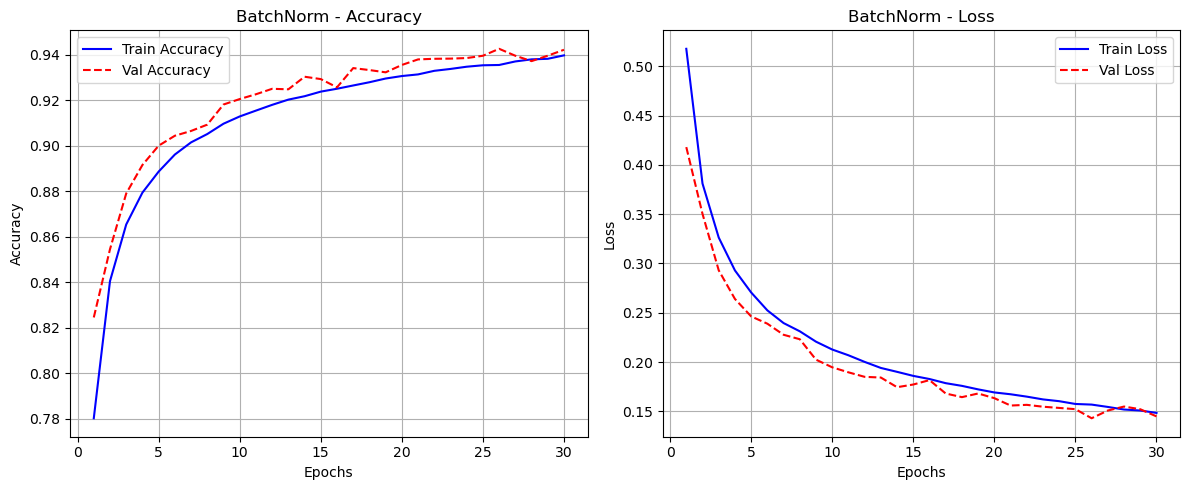

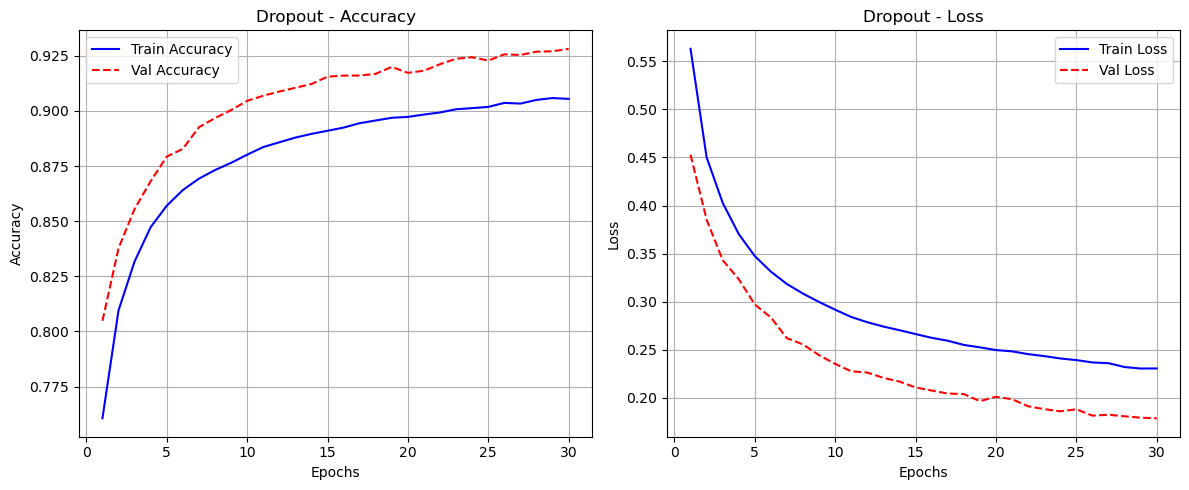

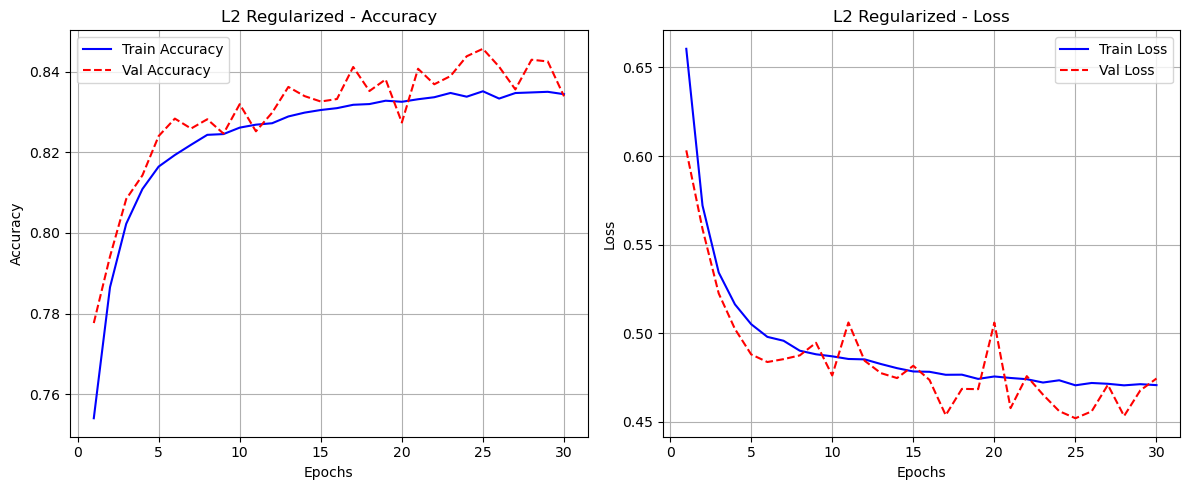

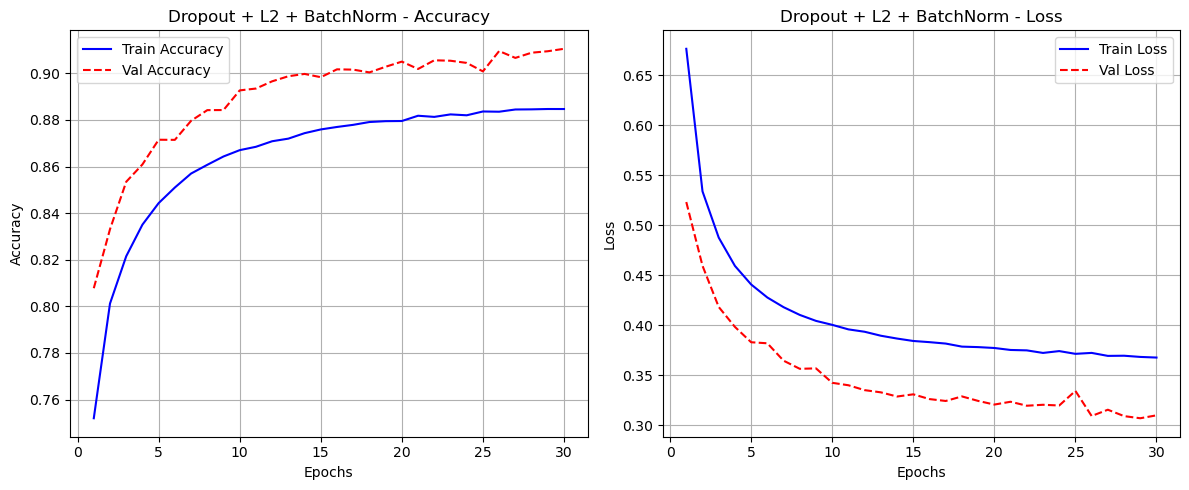

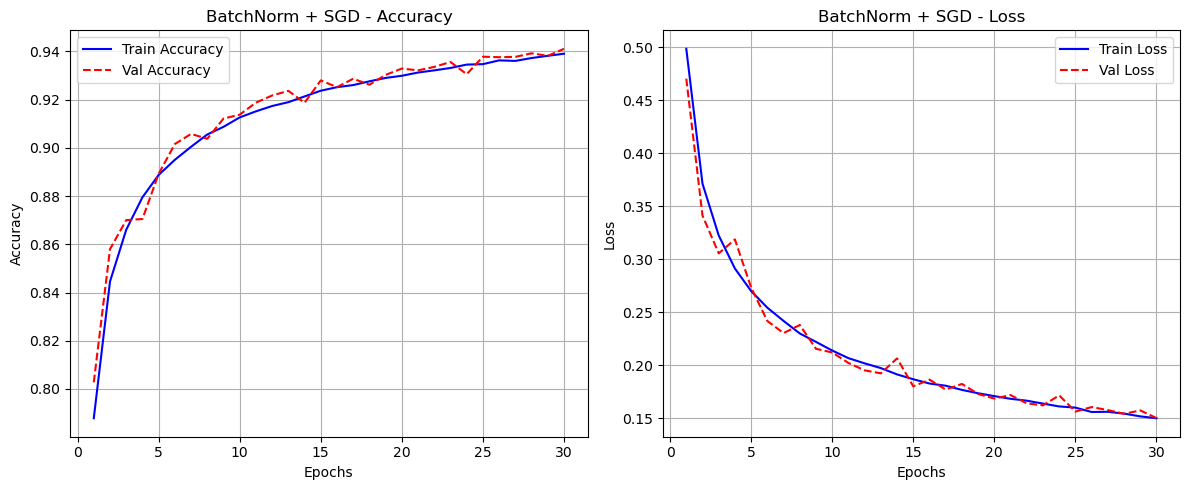

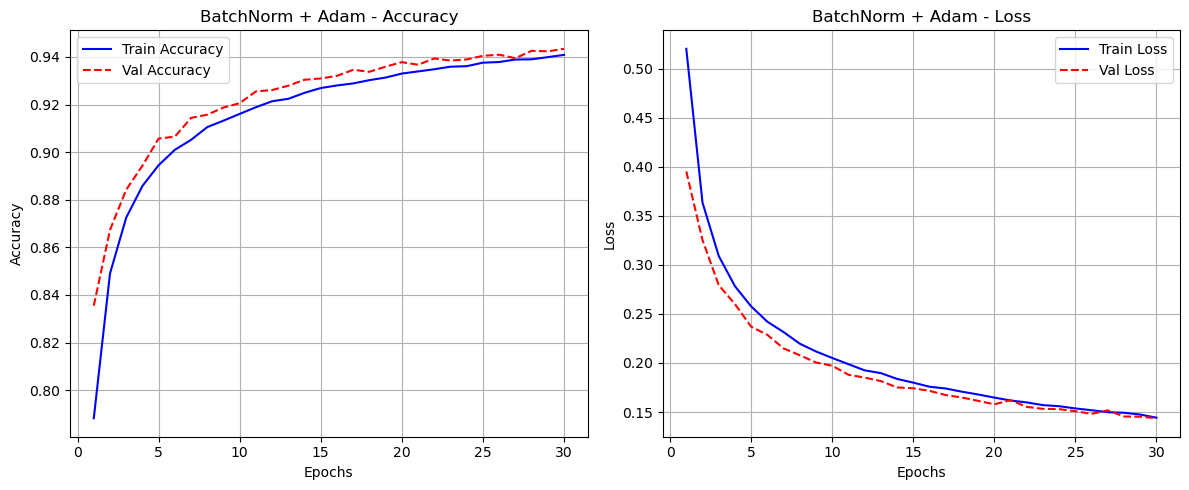

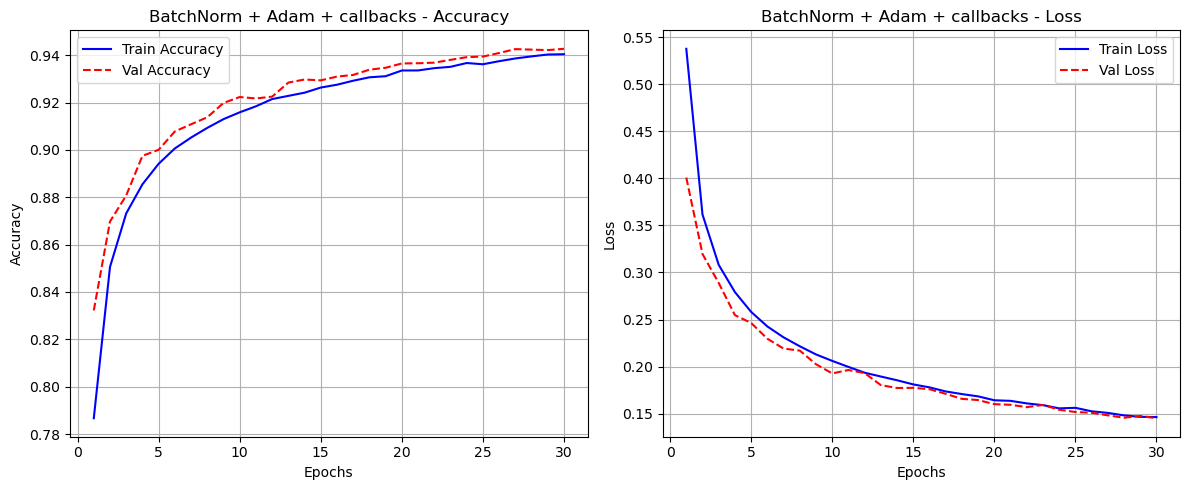

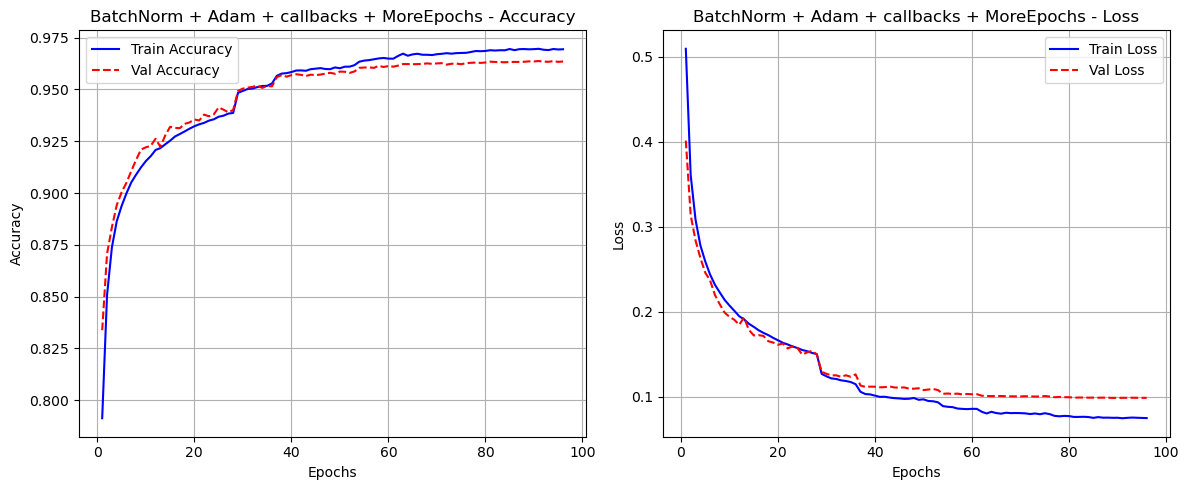

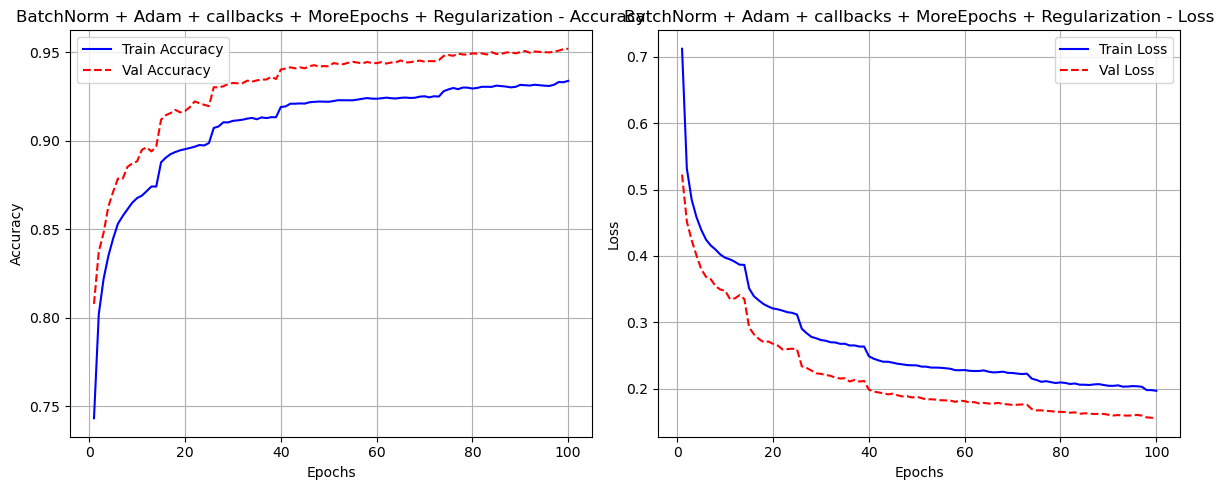

In [79]:
for name, history in histories.items():
    plot_learning_curves(history, title=name)


Final Summary of all Models:

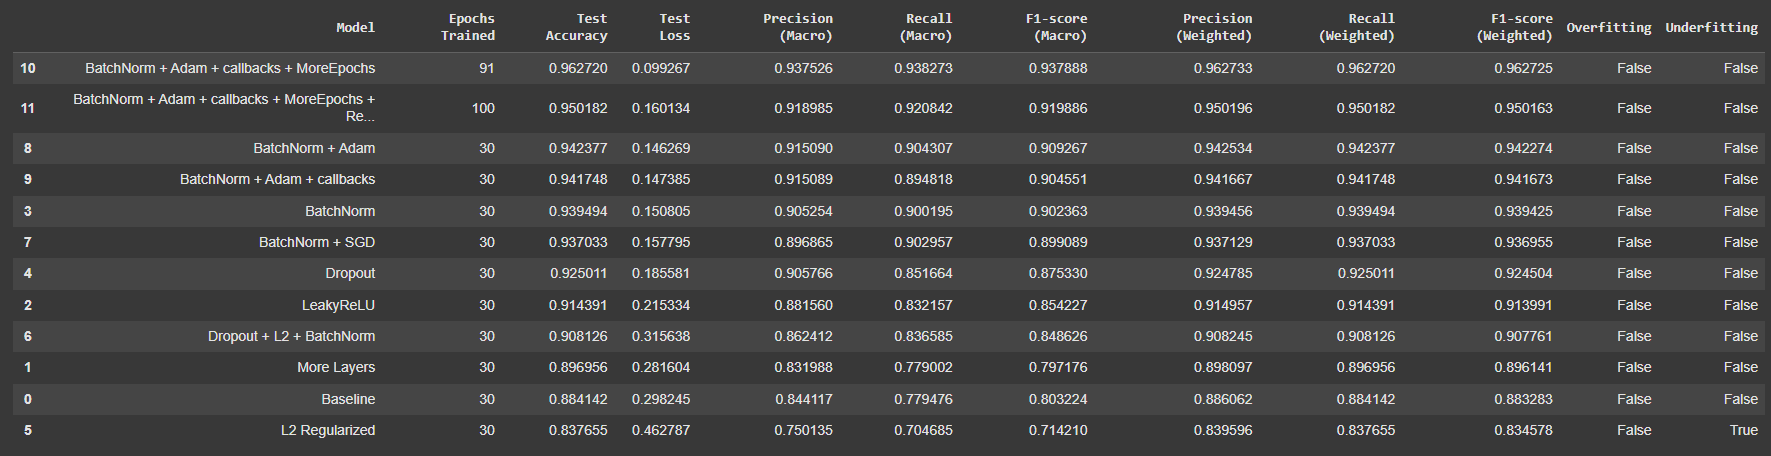

So in the summary above it can be seen that 94% acuracy was achived using just BatchNormalization and Adam ,
and by using BatchNormalization,Adam,callbacks and more epochs an accuracy of 96% was achived.

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
rf_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

In [82]:

rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [83]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay

In [84]:
# Accuracy on training set
train_preds = rf_clf.predict(X_train)
train_acc = accuracy_score(y_train, train_preds)
print("Train Accuracy:", round(train_acc, 4))

# Accuracy on test set
test_preds = rf_clf.predict(X_test)
test_acc = accuracy_score(y_test, test_preds)
print("Test Accuracy:", round(test_acc, 4))

Train Accuracy: 1.0
Test Accuracy: 0.9533


Test Accuracy: 0.9533

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     42368
           1       0.95      0.97      0.96     56661
           2       0.94      0.96      0.95      7151
           3       0.92      0.86      0.89       549
           4       0.95      0.77      0.85      1899
           5       0.93      0.89      0.91      3473
           6       0.97      0.95      0.96      4102

    accuracy                           0.95    116203
   macro avg       0.95      0.91      0.92    116203
weighted avg       0.95      0.95      0.95    116203



<Figure size 800x600 with 0 Axes>

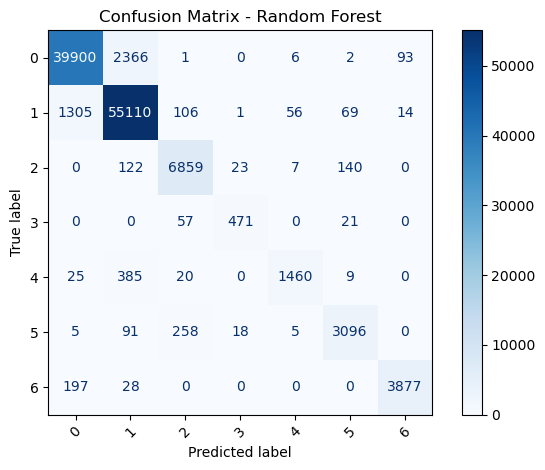

In [85]:
y_pred = rf_clf.predict(X_test)

# 3. Print accuracy
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# 4. Print classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0))

# 5. Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 6. Define class labels
class_labels = sorted(np.unique(y_test))  # e.g., [0, 1, 2, 3, 4, 5, 6]

# 7. Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Random Forest")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [86]:


# 2. Predict on test set
y_pred_rf = rf_clf.predict(X_test)

# 3. Accuracy
test_accuracy = accuracy_score(y_test, y_pred_rf)

# 4. Classification Report
rf_report = classification_report(y_test, y_pred_rf, output_dict=True, zero_division=0)

# 5. Confusion Matrix (for multiclass)
cm = confusion_matrix(y_test, y_pred_rf)

# 6. Manually calculate global TP, FP, TN, FN (aggregated across all classes)
TP = np.trace(cm)  # sum of true positives (diagonal)
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TN = cm.sum() - (TP + FP + FN)
# Accuracy on training set
train_preds = rf_clf.predict(X_train)
train_acc = accuracy_score(y_train, train_preds)
print("Train Accuracy:", round(train_acc, 4))

# Accuracy on test set
test_preds = rf_clf.predict(X_test)
test_acc = accuracy_score(y_test, test_preds)
print("Test Accuracy:", round(test_acc, 4))
# 7. Store results
rf_results_df = pd.DataFrame([{
    'Model': 'Random Forest',
    'Epochs Trained': 0,
    'Test Accuracy': test_accuracy,
    'Test Loss': None,
    'Precision (Macro)': rf_report['macro avg']['precision'],
    'Recall (Macro)': rf_report['macro avg']['recall'],
    'F1-score (Macro)': rf_report['macro avg']['f1-score'],
    'Precision (Weighted)': rf_report['weighted avg']['precision'],
    'Recall (Weighted)': rf_report['weighted avg']['recall'],
    'F1-score (Weighted)': rf_report['weighted avg']['f1-score'],
    'TP': TP,
    'FP': FP.sum(),
    'TN': TN,
    'FN': FN.sum(),
    'Overfitting': train_acc > (test_acc + 0.015),
    'Underfitting': (train_acc < 0.85) and (test_acc < 0.85)
}])




Train Accuracy: 1.0
Test Accuracy: 0.9533


In [87]:
# 8. Display results
rf_results_df

,Model,Epochs Trained,Test Accuracy,Test Loss,Precision (Macro),Recall (Macro),F1-score (Macro),Precision (Weighted),Recall (Weighted),F1-score (Weighted),TP,FP,TN,FN,Overfitting,Underfitting
0,Random Forest,0,0.953271,None,0.945971,0.90527,0.923951,0.953402,0.953271,0.953031,110773,5430,"[1430, 887, 4696, 5310, 4917, 4812, 5098]",5430,True,False


In [88]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, scoring='accuracy', n_jobs=-1, verbose=10)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9468426818809489


In [89]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     42368
           1       0.95      0.97      0.96     56661
           2       0.94      0.96      0.95      7151
           3       0.92      0.85      0.88       549
           4       0.95      0.78      0.86      1899
           5       0.93      0.89      0.91      3473
           6       0.97      0.95      0.96      4102

    accuracy                           0.95    116203
   macro avg       0.95      0.91      0.92    116203
weighted avg       0.95      0.95      0.95    116203

[[39920  2348     1     0     6     3    90]
 [ 1241 55171   111     1    56    65    16]
 [    0   121  6865    26     7   132     0]
 [    0     0    60   468     0    21     0]
 [   24   368    21     0  1477     9     0]
 [    5    94   257    16     4  3097     0]
 [  189    24     0     0     0     0  3889]]


In [90]:
# Accuracy on training set
train_preds = best_model.predict(X_train)
train_acc = accuracy_score(y_train, train_preds)
print("Train Accuracy:", round(train_acc, 4))

# Accuracy on test set
test_preds = best_model.predict(X_test)
test_acc = accuracy_score(y_test, test_preds)
print("Test Accuracy:", round(test_acc, 4))

Train Accuracy: 1.0
Test Accuracy: 0.9543


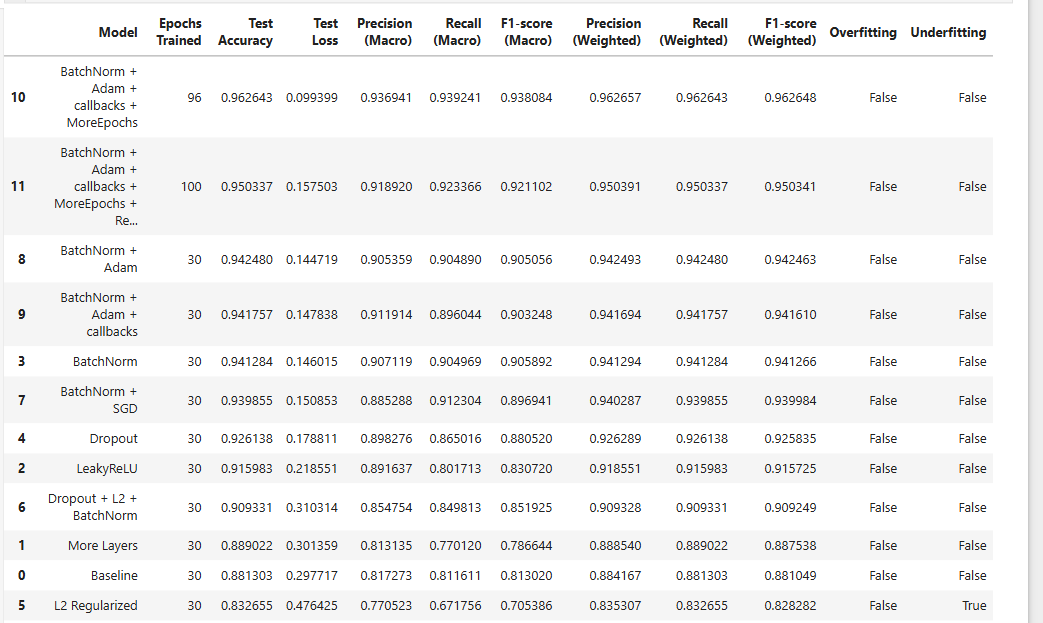

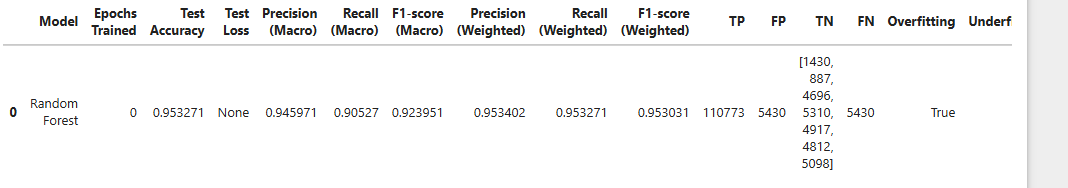

Based on my results, MLPs slightly outperformed Random Forest in terms of test accuracy and F1-score, especially with more training epochs and regularization. However, Random Forest achieved strong performance (95.4% accuracy) with minimal tuning and no risk of overfitting despite a perfect training score. This shows that while MLPs can surpass RF with careful optimization, tree-based models are more efficient and robust on structured/tabular data.